In [1]:
#CHILD03 	CHILD07 	CHILD12 	CHILD18 	NUMCHLD *55

# Group nºXX

**Group members:**
- João Lucas, m2020
- Luís Almeida, m20200666
- Mohamed Elbawab, m20201102

**LIBRARIES**

In [2]:
#Loading libraries
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from string import ascii_letters

import mglearn

from itertools import product

import warnings
warnings.filterwarnings('ignore')

import time

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

**IMPORT DATASET**

In [3]:
data = pd.read_csv('donors.csv')
data

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0  2009-01-01     GRI      0    IL  61081                     
1               1  2014-01-01     BOA      1    CA  91326                     
2               2  2010-01-01     AMH      1    NC  27017                     
3               3  2007-01-01     BRY      0    CA  95953                     
4               4  2006-01-01              0    FL  33176                     
...           ...         ...     ...    ...   ...    ...      ...      ...   
95407       95407  2016-01-01     ASE      1    AK  99504                     
95408       95408  2016-01-01     DCD      1    TX  77379                     
95409       95409  2015-01-01     MBC      1    MI  48910                     
95410       95410  2006-01-01     PRV      0    CA  91320                     
95411       95411  2008-01-01     MCC      2    NC  28409                     

              DOB NOEXCH  ...    AVGGIFT CONTROLN HPHONE_D RFA_2R RFA_2F  \
0      1957-12-01      0  ...   7.741935    95515        0      L      4   
1      1972-02-01      0  ...  15.666667   148535        0      L      2   
2             NaN      0  ...   7.481481    15078        1      L      4   
3      1948-01-01      0  ...   6.812500   172556        1      L      4   
4      1940-01-01      0  ...   6.864865     7112        1      L      2   
...           ...    ...  ...        ...      ...      ...    ...    ...   
95407         NaN      0  ...  25.000000   184568        0      L      1   
95408  1970-01-01      0  ...  20.000000   122706        1      L      1   
95409  1958-01-01      0  ...   8.285714   189641        1      L      3   
95410  1960-05-01      0  ...  12.146341     4693        1      L      4   
95411  1938-01-01      0  ...  96.794872   185114        1      L      1   

      RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
0          E        X        X        X        C  
1          G        X        X        X        A  
2          E        X        X        X        C  
3          E        X        X        X        C  
4          F        X        X        X        A  
...      ...      ...      ...      ...      ...  
95407      G        X        X        X        C  
95408      F        X        X        X        A  
95409      E        X        X        X        B  
95410      F        X        X        X        A  
95411      G        C        1        C        C  

[95412 rows x 476 columns]

**INITIAL ANALYSIS**

In [4]:
print(data.shape)
pd.options.display.max_columns = 476
data

(95412, 476)


Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0  2009-01-01     GRI      0    IL  61081                     
1               1  2014-01-01     BOA      1    CA  91326                     
2               2  2010-01-01     AMH      1    NC  27017                     
3               3  2007-01-01     BRY      0    CA  95953                     
4               4  2006-01-01              0    FL  33176                     
...           ...         ...     ...    ...   ...    ...      ...      ...   
95407       95407  2016-01-01     ASE      1    AK  99504                     
95408       95408  2016-01-01     DCD      1    TX  77379                     
95409       95409  2015-01-01     MBC      1    MI  48910                     
95410       95410  2006-01-01     PRV      0    CA  91320                     
95411       95411  2008-01-01     MCC      2    NC  28409                     

              DOB NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN  \
0      1957-12-01      0                                   XXXX     T2   
1      1972-02-01      0                                   XXXX     S1   
2             NaN      0                                   XXXX     R2   
3      1948-01-01      0                                   XXXX     R2   
4      1940-01-01      0        X     X                    XXXX     S2   
...           ...    ...      ...   ...     ...      ...    ...    ...   
95407         NaN      0                                   XXXX     C2   
95408  1970-01-01      0                                   XXXX     C1   
95409  1958-01-01      0              X                    XXXX     C3   
95410  1960-05-01      0        X                          XXXX     C1   
95411  1938-01-01      0        X             X            C1CM     C1   

      HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  \
0                                                   NaN     NaN      F   
1            H                               M      1.0     6.0      M   
2            U                                      NaN     3.0      M   
3            U                                      NaN     1.0      F   
4            H                                      1.0     3.0      F   
...        ...     ...     ...     ...     ...      ...     ...    ...   
95407                                               NaN     NaN      M   
95408        H                               M      1.0     7.0      M   
95409                                               NaN     NaN      M   
95410        H                                      NaN     7.0      F   
95411        U                                      NaN     5.0      F   

       WEALTH1  HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  \
0          NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
1          9.0   16      0.0       0.0      3.0       1.0      1.0     1.0   
2          1.0    2      0.0       0.0      1.0       0.0      0.0     0.0   
3          4.0    2      0.0       0.0      0.0       0.0      0.0     0.0   
4          2.0   60      1.0       0.0      9.0       0.0      4.0     1.0   
...        ...  ...      ...       ...      ...       ...      ...     ...   
95407      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95408      9.0    1      0.0       0.0      1.0       0.0      0.0     0.0   
95409      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95410      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95411      8.0    3      0.0       0.0      0.0       0.0      1.0     0.0   

       MAGMALE  PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  \
0          NaN       NaN       NaN      NaN       NaN       NaN       NaN   
1          0.0       0.0       0.0      2.0       0.0       3.0       0.0   
2          0.0       0.0       0.0      1.0       0.0       0.0       0.0   
3          0.0       0.0       0.0 

In [5]:
list(data.columns)

['Unnamed: 0',
 'ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'E

In [6]:
data.describe(include="all")

Unnamed: 0     ODATEDW OSOURCE         TCODE  STATE    ZIP MAILCODE  \
count   95412.000000       95412   95412  95412.000000  95412  95412    95412   
unique           NaN          54     896           NaN     57  19938        2   
top              NaN  2015-01-01     MBC           NaN     CA  85351            
freq             NaN       15358    4539           NaN  17343     61    94013   
mean    47705.500000         NaN     NaN     54.223117    NaN    NaN      NaN   
std     27543.216279         NaN     NaN    953.844476    NaN    NaN      NaN   
min         0.000000         NaN     NaN      0.000000    NaN    NaN      NaN   
25%     23852.750000         NaN     NaN      0.000000    NaN    NaN      NaN   
50%     47705.500000         NaN     NaN      1.000000    NaN    NaN      NaN   
75%     71558.250000         NaN     NaN      2.000000    NaN    NaN      NaN   
max     95411.000000         NaN     NaN  72002.000000    NaN    NaN      NaN   

       PVASTATE         DOB NOEXCH RECINHSE  RECP3 RECPGVG RECSWEEP MDMAUD  \
count     95412       71529  95412    95412  95412   95412    95412  95412   
unique        3         847      6        2      2       2        2     28   
top              1968-01-01      0                                    XXXX   
freq      93954        1479  61203    88709  93395   95298    93795  95118   
mean        NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
std         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
min         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
25%         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
50%         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
75%         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
max         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   

       DOMAIN HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18       NUMCHLD  \
count   95412    95412   95412   95412   95412   95412  12386.000000   
unique     17        3       4       4       4       4           NaN   
top        R2        H                                           NaN   
freq    13623    52354   94266   93846   93601   92565           NaN   
mean      NaN      NaN     NaN     NaN     NaN     NaN      1.527773   
std       NaN      NaN     NaN     NaN     NaN     NaN      0.806861   
min       NaN      NaN     NaN     NaN     NaN     NaN      1.000000   
25%       NaN      NaN     NaN     NaN     NaN     NaN      1.000000   
50%       NaN      NaN     NaN     NaN     NaN     NaN      1.000000   
75%       NaN      NaN     NaN     NaN     NaN     NaN      2.000000   
max       NaN      NaN     NaN     NaN     NaN     NaN      7.000000   

              INCOME GENDER       WEALTH1           HIT       MBCRAFT  \
count   74126.000000  95412  50680.000000  95412.000000  42558.000000   
unique           NaN      7           NaN           NaN           NaN   
top              NaN      F           NaN           NaN           NaN   
freq             NaN  51277           NaN           NaN           NaN   
mean        3.886248    NaN      5.345699      3.321438      0.152075   
std         1.854960    NaN      2.742490      9.306899      0.470023   
min         1.000000    NaN      0.000000      0.000000      0.000000   
25%         2.000000    NaN      3.000000      0.000000      0.000000   
50%         4.000000    NaN      6.000000      0.000000      0.000000   
75%         5.000000    NaN      8.000000      3.000000      0.000000   
max         7.000000    NaN      9.000000    241.000000      6.000000   

            MBGARDEN       MBBOOKS      MBCOLECT       MAGFAML        MAGFEM  \
count   42558.000000  42558.000000  42498.000000  42558.000000  42558.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN    

In [7]:
data.duplicated().sum()

0

In [8]:
null_values = pd.DataFrame(round((data.isna().sum()/len(data))*100,2))
null_values.rename(columns={0:'% of Null Values'}, inplace=True)
pd.options.display.max_rows = 476
null_values

% of Null Values
Unnamed: 0              0.00
ODATEDW                 0.00
OSOURCE                 0.00
TCODE                   0.00
STATE                   0.00
ZIP                     0.00
MAILCODE                0.00
PVASTATE                0.00
DOB                    25.03
NOEXCH                  0.00
RECINHSE                0.00
RECP3                   0.00
RECPGVG                 0.00
RECSWEEP                0.00
MDMAUD                  0.00
DOMAIN                  0.00
HOMEOWNR                0.00
CHILD03                 0.00
CHILD07                 0.00
CHILD12                 0.00
CHILD18                 0.00
NUMCHLD                87.02
INCOME                 22.31
GENDER                  0.00
WEALTH1                46.88
HIT                     0.00
MBCRAFT                55.40
MBGARDEN               55.40
MBBOOKS                55.40
MBCOLECT               55.46
MAGFAML                55.40
MAGFEM                 55.40
MAGMALE                55.40
PUBGARDN               55.40
PUBCULIN               55.40
PUBHLTH                55.40
PUBDOITY               55.40
PUBNEWFN               55.40
PUBPHOTO               55.40
PUBOPP                 55.40
DATASRCE                0.00
MALEMILI                0.00
MALEVET                 0.00
VIETVETS                0.00
WWIIVETS                0.00
LOCALGOV                0.00
STATEGOV                0.00
FEDGOV                  0.00
SOLP3                   0.00
SOLIH                   0.00
MAJOR                   0.00
WEALTH2                45.93
GEOCODE                 0.00
COLLECT1                0.00
VETERANS                0.00
BIBLE                   0.00
CATLG                   0.00
HOMEE                   0.00
PETS                    0.00
CDPLAY                  0.00
STEREO                  0.00
PCOWNERS                0.00
PHOTO                   0.00
CRAFTS                  0.00
FISHER                  0.00
GARDENIN                0.00
BOATS                   0.00
WALKER                  0.00
KIDSTUFF                0.00
CARDS                   0.00
PLATES                  0.00
LIFESRC                 0.00
PEPSTRFL                0.00
POP901                  0.00
POP902                  0.00
POP903                  0.00
POP90C1                 0.00
POP90C2                 0.00
POP90C3                 0.00
POP90C4                 0.00
POP90C5                 0.00
ETH1                    0.00
ETH2                    0.00
ETH3                    0.00
ETH4                    0.00
ETH5                    0.00
ETH6                    0.00
ETH7                    0.00
ETH8                    0.00
ETH9                    0.00
ETH10                   0.00
ETH11                   0.00
ETH12                   0.00
ETH13                   0.00
ETH14                   0.00
ETH15                   0.00
ETH16                   0.00
AGE901                  0.00
AGE902                  0.00
AGE903                  0.00
AGE904                  0.00
AGE905                  0.00
AGE906                  0.00
AGE907                  0.00
CHIL1                   0.00
CHIL2                   0.00
CHIL3                   0.00
AGEC1                   0.00
AGEC2                   0.00
AGEC3                   0.00
AGEC4                   0.00
AGEC5                   0.00
AGEC6                   0.00
AGEC7                   0.00
CHILC1                  0.00
CHILC2                  0.00
CHILC3                  0.00
CHILC4                  0.00
CHILC5                  0.00
HHAGE1                  0.00
HHAGE2                  0.00
HHAGE3                  0.00
HHN1                    0.00
HHN2                    0.00
HHN3                    0.00
HHN4                    0.00
HHN5                    0.00
HHN6                    0.00
MARR1                   0.00
MARR2                   0.00
MARR3                   0.00
MARR4                   0.00
HHP1                    0.00
HHP2                    0.00
DW1                     0.00
DW2                     0.00
DW3                     0.00
DW4       

**PRE-PROCESSING** 1st Iteration

In [9]:
prov_data = data.copy() 

In [10]:
# These were features deemed important for the clustering (some of them after engineering)
promising_features = ["ODATEDW", "DOB (AGE)", "DOMAIN", "MAJOR", "NUMCHLD","INCOME","HIT",
                      "MBCRAFT until PUBOPP(TOT_PUBS)","MALEMILI","MALEVET","VIETVETS","WWIIVETS",
                      "MAJOR","WEALTH2","CARDPROM","MAXADATE","NUMPROM","CARDPM12","NUMPRM12","RAMNTALL",
                      "NGIFTALL","CARDGIFT","MINRAMNT","MINRDATE","MAXRAMNT","MAXRDATE","LASTGIFT","LASTDATE",
                      "TIMELAG","AVGGIFT","CONTROLN","RFA_2F","RFA_2A","MDMAUD_R","MDMAUD_F","MDMAUD_A"]

In [11]:
# prov_data["ZIP"] = prov_data["ZIP"].str.replace("-", "")
# prov_data["ZIP"] = prov_data["ZIP"].astype(int) 
# prov_data = prov_data.drop(prov_data[prov_data["MAILCODE"]=="B"].index)
# prov_data = prov_data.drop(columns={"Unnamed: 0","MAILCODE","TCODE","NOEXCH","PVASTATE","MDMAUD","SOLP3","SOLIH","GEOCODE"})
prov_data["ODATEDW"] = pd.to_datetime(prov_data["ODATEDW"])
prov_data["DOB"] =  pd.to_datetime(prov_data["DOB"])
# prov_data["RECINHSE"].replace("X",1,inplace=True)
# prov_data["RECINHSE"].replace(" ",0,inplace=True)
# prov_data["RECP3"].replace("X",1,inplace=True)
# prov_data["RECP3"].replace(" ",0,inplace=True)
# prov_data["RECPGVG"].replace("X",1,inplace=True)
# prov_data["RECPGVG"].replace(" ",0,inplace=True)
# prov_data["RECSWEEP"].replace("X",1,inplace=True)
# prov_data["RECSWEEP"].replace(" ",0,inplace=True)
prov_data["DOMAIN"].replace(" ",np.nan,inplace=True)
# prov_data["HOMEOWNR"].replace(" ",0,inplace=True)
# prov_data["HOMEOWNR"].replace("H",1,inplace=True)
# prov_data["HOMEOWNR"].replace("U",1,inplace=True)#acts as mode filling
# prov_data["HOMEOWNR"].astype(int)
prov_data['NUMCHLD'].fillna(0,inplace=True)
prov_data['NUMCHLD'].astype(int)
# prov_data["DATASRCE"].replace(" ",np.nan,inplace=True)
prov_data["MAJOR"].replace(" ",0,inplace=True)
prov_data["MAJOR"].replace("X",1,inplace=True)
# prov_data["COLLECT1"].replace(" ",0,inplace=True)
# prov_data["COLLECT1"].replace("Y",1,inplace=True)
# prov_data["VETERANS"].replace(" ",0,inplace=True)
# prov_data["VETERANS"].replace("Y",1,inplace=True)
# prov_data["BIBLE"].replace(" ",0,inplace=True)
# prov_data["BIBLE"].replace("Y",1,inplace=True)
# prov_data["CATLG"].replace(" ",0,inplace=True)
# prov_data["CATLG"].replace("Y",1,inplace=True)
# prov_data["HOMEE"].replace(" ",0,inplace=True)
# prov_data["HOMEE"].replace("Y",1,inplace=True)
# prov_data["PETS"].replace(" ",0,inplace=True)
# prov_data["PETS"].replace("Y",1,inplace=True)
# prov_data["CDPLAY"].replace(" ",0,inplace=True)
# prov_data["CDPLAY"].replace("Y",1,inplace=True)
# prov_data["STEREO"].replace(" ",0,inplace=True)
# prov_data["STEREO"].replace("Y",1,inplace=True)
# prov_data["PCOWNERS"].replace(" ",0,inplace=True)
# prov_data["PCOWNERS"].replace("Y",1,inplace=True)
# prov_data["PHOTO"].replace(" ",0,inplace=True)
# prov_data["PHOTO"].replace("Y",1,inplace=True)
# prov_data["CRAFTS"].replace(" ",0,inplace=True)
# prov_data["CRAFTS"].replace("Y",1,inplace=True)
# prov_data["FISHER"].replace(" ",0,inplace=True)
# prov_data["FISHER"].replace("Y",1,inplace=True)
# prov_data["GARDENIN"].replace(" ",0,inplace=True)
# prov_data["GARDENIN"].replace("Y",1,inplace=True)
# prov_data["BOATS"].replace(" ",0,inplace=True)
# prov_data["BOATS"].replace("Y",1,inplace=True)
# prov_data["WALKER"].replace(" ",0,inplace=True)
# prov_data["WALKER"].replace("Y",1,inplace=True)
# prov_data["KIDSTUFF"].replace(" ",0,inplace=True)
# prov_data["KIDSTUFF"].replace("Y",1,inplace=True)
# prov_data["CARDS"].replace(" ",0,inplace=True)
# prov_data["CARDS"].replace("Y",1,inplace=True)
# prov_data["PLATES"].replace(" ",0,inplace=True)
# prov_data["PLATES"].replace("Y",1,inplace=True)
# prov_data["LIFESRC"].replace(" ",np.nan,inplace=True)
# prov_data["PEPSTRFL"].replace(" ",0,inplace=True)
# prov_data["PEPSTRFL"].replace("X",1,inplace=True)
prov_data.loc[:,"MALEMILI":"FEDGOV"] = prov_data.loc[:,"MALEMILI":"FEDGOV"]/100 
# prov_data.loc[:,"POP90C1":"ETH16"] = prov_data.loc[:,"POP90C1":"ETH16"]/100
# prov_data.loc[:,"AGE907":"MARR4"] = prov_data.loc[:,"AGE907":"MARR4"]/100  
# prov_data.loc[:,"DW1":"DW9"] = prov_data.loc[:,"DW1":"DW9"]/100 
# prov_data.loc[:,"HU1":"HUR2"] = prov_data.loc[:,"HU1":"HUR2"]/100 
# prov_data.loc[:,"HUPA1":"RP4"] = prov_data.loc[:,"HUPA1":"RP4"]/100 
# prov_data.loc[:,"IC6":"PEC2"] = prov_data.loc[:,"IC6":"PEC2"]/100 
# prov_data.loc[:,"TPE12":"OEDC7"] = prov_data.loc[:,"TPE12":"OEDC7"]/100 
# prov_data.loc[:,"EC2":"HC21"] = prov_data.loc[:,"EC2":"HC21"]/100
# prov_data.loc[:,"AC1":"AC2"] = prov_data.loc[:,"AC1":"AC2"]/100 
# prov_data["ADATE_2"] = pd.to_datetime(prov_data["ADATE_2"])
# prov_data["ADATE_3"] = pd.to_datetime(prov_data["ADATE_3"])
# prov_data["ADATE_4"] = pd.to_datetime(prov_data["ADATE_4"])
# prov_data["ADATE_5"] = pd.to_datetime(prov_data["ADATE_5"])
# prov_data["ADATE_6"] = pd.to_datetime(prov_data["ADATE_6"])
# prov_data["ADATE_7"] = pd.to_datetime(prov_data["ADATE_7"])
# prov_data["ADATE_8"] = pd.to_datetime(prov_data["ADATE_8"])
# prov_data["ADATE_9"] = pd.to_datetime(prov_data["ADATE_9"])
# prov_data["ADATE_10"] = pd.to_datetime(prov_data["ADATE_10"])
# prov_data["ADATE_11"] = pd.to_datetime(prov_data["ADATE_11"])
# prov_data["ADATE_12"] = pd.to_datetime(prov_data["ADATE_12"])
# prov_data["ADATE_13"] = pd.to_datetime(prov_data["ADATE_13"])
# prov_data["ADATE_14"] = pd.to_datetime(prov_data["ADATE_14"])
# prov_data["ADATE_15"] = pd.to_datetime(prov_data["ADATE_15"])
# prov_data["ADATE_16"] = pd.to_datetime(prov_data["ADATE_16"])
# prov_data["ADATE_17"] = pd.to_datetime(prov_data["ADATE_17"])
# prov_data["ADATE_18"] = pd.to_datetime(prov_data["ADATE_18"])
# prov_data["ADATE_19"] = pd.to_datetime(prov_data["ADATE_19"])
# prov_data["ADATE_20"] = pd.to_datetime(prov_data["ADATE_20"])
# prov_data["ADATE_21"] = pd.to_datetime(prov_data["ADATE_21"])
# prov_data["ADATE_22"] = pd.to_datetime(prov_data["ADATE_22"])
# prov_data["ADATE_23"] = pd.to_datetime(prov_data["ADATE_23"])
# prov_data["ADATE_24"] = pd.to_datetime(prov_data["ADATE_24"])
prov_data["MAXADATE"] = pd.to_datetime(prov_data["MAXADATE"])
prov_data["RFA_3"].replace(" ",np.nan,inplace=True)
# prov_data["RDATE_3"] = pd.to_datetime(prov_data["RDATE_3"])
# prov_data["RDATE_4"] = pd.to_datetime(prov_data["RDATE_4"])
# prov_data["RDATE_5"] = pd.to_datetime(prov_data["RDATE_5"])
# prov_data["RDATE_6"] = pd.to_datetime(prov_data["RDATE_6"])
# prov_data["RDATE_7"] = pd.to_datetime(prov_data["RDATE_7"])
# prov_data["RDATE_8"] = pd.to_datetime(prov_data["RDATE_8"])
# prov_data["RDATE_9"] = pd.to_datetime(prov_data["RDATE_9"])
# prov_data["RDATE_10"] = pd.to_datetime(prov_data["RDATE_10"])
# prov_data["RDATE_11"] = pd.to_datetime(prov_data["RDATE_11"])
# prov_data["RDATE_12"] = pd.to_datetime(prov_data["RDATE_12"])
# prov_data["RDATE_13"] = pd.to_datetime(prov_data["RDATE_13"])
# prov_data["RDATE_14"] = pd.to_datetime(prov_data["RDATE_14"])
# prov_data["RDATE_15"] = pd.to_datetime(prov_data["RDATE_15"])
# prov_data["RDATE_16"] = pd.to_datetime(prov_data["RDATE_16"])
# prov_data["RDATE_17"] = pd.to_datetime(prov_data["RDATE_17"])
# prov_data["RDATE_18"] = pd.to_datetime(prov_data["RDATE_18"])
# prov_data["RDATE_19"] = pd.to_datetime(prov_data["RDATE_19"])
# prov_data["RDATE_20"] = pd.to_datetime(prov_data["RDATE_20"])
# prov_data["RDATE_21"] = pd.to_datetime(prov_data["RDATE_21"])
# prov_data["RDATE_22"] = pd.to_datetime(prov_data["RDATE_22"])
# prov_data["RDATE_23"] = pd.to_datetime(prov_data["RDATE_23"])
# prov_data["RDATE_24"] = pd.to_datetime(prov_data["RDATE_24"])
prov_data["MINRDATE"] = pd.to_datetime(prov_data["MINRDATE"])
prov_data["MAXRDATE"] = pd.to_datetime(prov_data["MAXRDATE"])
prov_data["LASTDATE"] = pd.to_datetime(prov_data["LASTDATE"])
# prov_data["FISTDATE"] = pd.to_datetime(prov_data["FISTDATE"])
# prov_data["NEXTDATE"] = pd.to_datetime(prov_data["NEXTDATE"])
# prov_data = prov_data.drop(columns=data.loc[:,"ADATE_2":"RFA_24"].columns)
# prov_data = prov_data.drop(columns=data.loc[:,"RDATE_3":"RAMNT_24"].columns)
# prov_data["LIFETIME_OF_DONOR_DATA"] = prov_data["LASTDATE"]-prov_data["ODATEDW"]
# prov_data["LIFETIME_OF_DONOR_DATA"] = prov_data["LIFETIME_OF_DONOR_DATA"].dt.days
# prov_data = prov_data.drop(columns="ODATEDW")
# prov_data

**PANDAS PROFILING**

In [12]:
# ProfileReport(prov_data,correlations={
#        "pearson": {"calculate": True},
#        "spearman": {"calculate": False},
#        "kendall": {"calculate": False},
#        "phi_k": {"calculate": False},
#        "cramers": {"calculate": False},
#    },
# )

In [13]:
# sns.set_theme(style="white")
# corr = prov_data.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(30, 25))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
#             square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

**FEATURE DEFINITION**

In [14]:
# metric_features = ["NUMCHLD","HIT","MALEMILI","MALEVET","VIETVETS","WWIIVETS","LOCALGOV","STATEGOV","FEDGOV"]
# metric_features_2 = prov_data.loc[:,"MBCRAFT":"PUBOPP"].columns.tolist()
# metric_features_3 = prov_data.loc[:,"POP901":"RP4"].columns.tolist()
# metric_features_4 = prov_data.loc[:,"IC1":"AC2"].columns.tolist()
# metric_features_5 = ["CARDPROM","NUMPROM","CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MAXRAMNT","LASTGIFT","TIMELAG","AVGGIFT"]

In [15]:
# metric_features.extend(metric_features_2)
# metric_features.extend(metric_features_3)
# metric_features.extend(metric_features_4)
# metric_features.extend(metric_features_5)

In [16]:
# non_metric_features = prov_data.columns.drop(metric_features).to_list()

**STANDARDIZATION**

-- Standard Scaler --

In [17]:
#this one seems to be giving strange values 

In [18]:
# scaler = StandardScaler()
# scaled_feat = scaler.fit_transform(prov_data[metric_features])
# print(scaled_feat)
# scaler_test = StandardScaler()
# scaled_feat_test = scaler_test.fit_transform(prov_data[metric_features])
# print(scaled_feat_test)

In [19]:
# prov_data[metric_features] = scaled_feat

-- Min Max Scaler --

In [20]:
# scaler = MinMaxScaler()
# scaled_feat = scaler.fit_transform(prov_data[metric_features])
# scaled_feat

In [21]:
# print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

In [22]:
# prov_data[metric_features] = scaled_feat

**MISSING VALUES IMPUTATION**

In [23]:
# null_values = pd.DataFrame(round((prov_data[metric_features].isna().sum()/len(data))*100,2))
# null_values.rename(columns={0:'% of Null Values'}, inplace=True)
# pd.options.display.max_rows = 476
# null_values

-- KNN Imputer --

In [24]:
# feat_KNN = []
# for i in range(len(prov_data[metric_features].isna().any())):
#     if (prov_data[metric_features].isna().any()==True)[i]==True:
#         feat_KNN.append((prov_data[metric_features].isna().any()==True).index[i])

In [25]:
# feat_KNN

In [26]:
# from sklearn.impute import KNNImputer
# nans_index = feat_KNN
# prov_data[nans_index]

In [27]:
# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# prov_data[metric_features] = imputer.fit_transform(prov_data[metric_features])
# prov_data.loc[nans_index, metric_features]

**PRE-PROCESSING** 2nd Iteration

In [28]:
prov_data

Unnamed: 0    ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0 2009-01-01     GRI      0    IL  61081                     
1               1 2014-01-01     BOA      1    CA  91326                     
2               2 2010-01-01     AMH      1    NC  27017                     
3               3 2007-01-01     BRY      0    CA  95953                     
4               4 2006-01-01              0    FL  33176                     
...           ...        ...     ...    ...   ...    ...      ...      ...   
95407       95407 2016-01-01     ASE      1    AK  99504                     
95408       95408 2016-01-01     DCD      1    TX  77379                     
95409       95409 2015-01-01     MBC      1    MI  48910                     
95410       95410 2006-01-01     PRV      0    CA  91320                     
95411       95411 2008-01-01     MCC      2    NC  28409                     

             DOB NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN  \
0     1957-12-01      0                                   XXXX     T2   
1     1972-02-01      0                                   XXXX     S1   
2            NaT      0                                   XXXX     R2   
3     1948-01-01      0                                   XXXX     R2   
4     1940-01-01      0        X     X                    XXXX     S2   
...          ...    ...      ...   ...     ...      ...    ...    ...   
95407        NaT      0                                   XXXX     C2   
95408 1970-01-01      0                                   XXXX     C1   
95409 1958-01-01      0              X                    XXXX     C3   
95410 1960-05-01      0        X                          XXXX     C1   
95411 1938-01-01      0        X             X            C1CM     C1   

      HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  \
0                                                   0.0     NaN      F   
1            H                               M      1.0     6.0      M   
2            U                                      0.0     3.0      M   
3            U                                      0.0     1.0      F   
4            H                                      1.0     3.0      F   
...        ...     ...     ...     ...     ...      ...     ...    ...   
95407                                               0.0     NaN      M   
95408        H                               M      1.0     7.0      M   
95409                                               0.0     NaN      M   
95410        H                                      0.0     7.0      F   
95411        U                                      0.0     5.0      F   

       WEALTH1  HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  \
0          NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
1          9.0   16      0.0       0.0      3.0       1.0      1.0     1.0   
2          1.0    2      0.0       0.0      1.0       0.0      0.0     0.0   
3          4.0    2      0.0       0.0      0.0       0.0      0.0     0.0   
4          2.0   60      1.0       0.0      9.0       0.0      4.0     1.0   
...        ...  ...      ...       ...      ...       ...      ...     ...   
95407      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95408      9.0    1      0.0       0.0      1.0       0.0      0.0     0.0   
95409      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95410      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95411      8.0    3      0.0       0.0      0.0       0.0      1.0     0.0   

       MAGMALE  PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  \
0          NaN       NaN       NaN      NaN       NaN       NaN       NaN   
1          0.0       0.0       0.0      2.0       0.0       3.0       0.0   
2          0.0       0.0       0.0      1.0       0.0       0.0       0.0   
3          0.0       0.0       0.0      0.0       0.0      

**FEATURE REMOVAL**

In [29]:
pd.options.display.max_rows=476
missing = prov_data.isnull().sum()[prov_data.isnull().sum()>0]
missing_percent = round(missing/prov_data.shape[0]*100,2)
missing_percent

DOB         25.03
DOMAIN       2.43
INCOME      22.31
WEALTH1     46.88
MBCRAFT     55.40
MBGARDEN    55.40
MBBOOKS     55.40
MBCOLECT    55.46
MAGFAML     55.40
MAGFEM      55.40
MAGMALE     55.40
PUBGARDN    55.40
PUBCULIN    55.40
PUBHLTH     55.40
PUBDOITY    55.40
PUBNEWFN    55.40
PUBPHOTO    55.40
PUBOPP      55.40
WEALTH2     45.93
MSA          0.14
ADI          0.14
DMA          0.14
ADATE_3      2.04
ADATE_4      2.30
ADATE_5     35.21
ADATE_6      3.73
ADATE_7      9.30
ADATE_8      3.68
ADATE_9     11.79
ADATE_10    34.32
ADATE_11    10.92
ADATE_12     9.35
ADATE_13    42.15
ADATE_14    19.77
ADATE_15    68.63
ADATE_16    21.34
ADATE_17    28.98
ADATE_18    22.29
ADATE_19    25.66
ADATE_20    52.61
ADATE_21    36.91
ADATE_22    26.88
ADATE_23    58.98
ADATE_24    38.75
RFA_3        2.04
RDATE_3     99.75
RDATE_4     99.71
RDATE_5     99.99
RDATE_6     99.19
RDATE_7     90.68
RDATE_8     77.50
RDATE_9     82.46
RDATE_10    89.04
RDATE_11    84.55
RDATE_12    73.06
RDATE_13  

In [30]:
# Check if there are any extreme values in missing data
missing_80 = missing_percent[missing_percent>80]
missing_80

RDATE_3     99.75
RDATE_4     99.71
RDATE_5     99.99
RDATE_6     99.19
RDATE_7     90.68
RDATE_9     82.46
RDATE_10    89.04
RDATE_11    84.55
RDATE_13    87.16
RDATE_15    92.39
RDATE_17    90.15
RDATE_19    83.36
RDATE_20    91.73
RDATE_21    90.03
RDATE_23    91.76
RDATE_24    81.41
RAMNT_3     99.75
RAMNT_4     99.71
RAMNT_5     99.99
RAMNT_6     99.19
RAMNT_7     90.68
RAMNT_9     82.46
RAMNT_10    89.04
RAMNT_11    84.55
RAMNT_13    87.16
RAMNT_15    92.39
RAMNT_17    90.15
RAMNT_19    83.36
RAMNT_20    91.73
RAMNT_21    90.03
RAMNT_23    91.76
RAMNT_24    81.41
dtype: float64

In [31]:
# We drop all the columns with more than 80% missing values due to unrealiabilty of data
prov_data.drop(columns = missing_80.index, inplace=True)

In [32]:
prov_data

Unnamed: 0    ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0 2009-01-01     GRI      0    IL  61081                     
1               1 2014-01-01     BOA      1    CA  91326                     
2               2 2010-01-01     AMH      1    NC  27017                     
3               3 2007-01-01     BRY      0    CA  95953                     
4               4 2006-01-01              0    FL  33176                     
...           ...        ...     ...    ...   ...    ...      ...      ...   
95407       95407 2016-01-01     ASE      1    AK  99504                     
95408       95408 2016-01-01     DCD      1    TX  77379                     
95409       95409 2015-01-01     MBC      1    MI  48910                     
95410       95410 2006-01-01     PRV      0    CA  91320                     
95411       95411 2008-01-01     MCC      2    NC  28409                     

             DOB NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN  \
0     1957-12-01      0                                   XXXX     T2   
1     1972-02-01      0                                   XXXX     S1   
2            NaT      0                                   XXXX     R2   
3     1948-01-01      0                                   XXXX     R2   
4     1940-01-01      0        X     X                    XXXX     S2   
...          ...    ...      ...   ...     ...      ...    ...    ...   
95407        NaT      0                                   XXXX     C2   
95408 1970-01-01      0                                   XXXX     C1   
95409 1958-01-01      0              X                    XXXX     C3   
95410 1960-05-01      0        X                          XXXX     C1   
95411 1938-01-01      0        X             X            C1CM     C1   

      HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  \
0                                                   0.0     NaN      F   
1            H                               M      1.0     6.0      M   
2            U                                      0.0     3.0      M   
3            U                                      0.0     1.0      F   
4            H                                      1.0     3.0      F   
...        ...     ...     ...     ...     ...      ...     ...    ...   
95407                                               0.0     NaN      M   
95408        H                               M      1.0     7.0      M   
95409                                               0.0     NaN      M   
95410        H                                      0.0     7.0      F   
95411        U                                      0.0     5.0      F   

       WEALTH1  HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  \
0          NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
1          9.0   16      0.0       0.0      3.0       1.0      1.0     1.0   
2          1.0    2      0.0       0.0      1.0       0.0      0.0     0.0   
3          4.0    2      0.0       0.0      0.0       0.0      0.0     0.0   
4          2.0   60      1.0       0.0      9.0       0.0      4.0     1.0   
...        ...  ...      ...       ...      ...       ...      ...     ...   
95407      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95408      9.0    1      0.0       0.0      1.0       0.0      0.0     0.0   
95409      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95410      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95411      8.0    3      0.0       0.0      0.0       0.0      1.0     0.0   

       MAGMALE  PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  \
0          NaN       NaN       NaN      NaN       NaN       NaN       NaN   
1          0.0       0.0       0.0      2.0       0.0       3.0       0.0   
2          0.0       0.0       0.0      1.0       0.0       0.0       0.0   
3          0.0       0.0       0.0      0.0       0.0      

**COEHERENCE CHECKING AND FEATURE ENGENEERING**

In [33]:
promising_features = ["ODATEDW", "DOB (AGE)", "DOMAIN", "MAJOR", "NUMCHLD","INCOME","HIT","MBCRAFT until PUBOPP(TOT_PUBS)",
                      "MALEMILI","MALEVET","VIETVETS","WWIIVETS","MAJOR","WEALTH2 or WEALTH1","CARDPROM","MAXADATE","NUMPROM",
                      "CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MINRDATE","MAXRAMNT",
                      "MAXRDATE","LASTGIFT","LASTDATE","TIMELAG","AVGGIFT","RFA_2F","RFA_2A",
                      "MDMAUD_R","MDMAUD_F","MDMAUD_A"]

In [34]:
clust_data = ["ODATEDW", "DOB", "DOMAIN", "NUMCHLD","INCOME","HIT",'MBCRAFT','MBGARDEN','MBBOOKS',
             'MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO',
             'PUBOPP',"MALEMILI","MALEVET","VIETVETS","WWIIVETS","MAJOR","WEALTH1","WEALTH2","CARDPROM","MAXADATE","NUMPROM",
             "CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MINRDATE","MAXRAMNT","MAXRDATE",
             "LASTGIFT","LASTDATE","TIMELAG","AVGGIFT","RFA_2F","RFA_2A","MDMAUD_R","MDMAUD_F","MDMAUD_A"]

In [35]:
final_data = pd.DataFrame(prov_data[clust_data])

In [36]:
final_data['AGE'] = (2020-pd.DatetimeIndex(prov_data['DOB']).year)
final_data['AGE'].isnull().sum()/prov_data.shape[0]

0.2503144258583826

In [37]:
final_data = final_data.drop(columns = 'DOB')

In [38]:
#Creating new variable TOT_PUBS
final_data['TOT_PUBS'] = data[['MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN',
                               'PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP']].sum(axis=1)

In [39]:
final_data = final_data.drop(columns = ['MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN',
                               'PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP'])

In [40]:
#Defining the date to use as reference
#the most recent date of all datetime64[ns] columns
datetime64_1 = prov_data.select_dtypes(include = 'datetime64[ns]')
datetime64_2 = final_data.select_dtypes(include = 'datetime64[ns]')

In [41]:
date_now = max(prov_data[datetime64_1.columns].max())

In [42]:
#transforming the datetime64 columns into float/int
final_data['DAYS_ODATEDW']= (date_now-final_data['ODATEDW']).dt.days
final_data['DAYS_MAXADATE']= (date_now-final_data['MAXADATE']).dt.days
final_data['DAYS_MINRDATE']= (date_now-final_data['MINRDATE']).dt.days
final_data['DAYS_MAXRDATE']= (date_now-final_data['MAXRDATE']).dt.days
final_data['DAYS_LASTDATE']= (date_now-final_data['LASTDATE']).dt.days
final_data = final_data.drop(columns= datetime64_2)

In [43]:
final_data = final_data.drop(columns='DOMAIN')
final_data = final_data.drop(columns= ['MDMAUD_R','MDMAUD_F','MDMAUD_A'])

In [44]:
final_data['RFA_3R'] = prov_data['RFA_3'].str[0]

In [45]:
final_data.dtypes

NUMCHLD          float64
INCOME           float64
HIT                int64
MALEMILI         float64
MALEVET          float64
VIETVETS         float64
WWIIVETS         float64
MAJOR              int64
WEALTH1          float64
WEALTH2          float64
CARDPROM           int64
NUMPROM            int64
CARDPM12           int64
NUMPRM12           int64
RAMNTALL         float64
NGIFTALL           int64
CARDGIFT           int64
MINRAMNT         float64
MAXRAMNT         float64
LASTGIFT         float64
TIMELAG          float64
AVGGIFT          float64
RFA_2F             int64
RFA_2A            object
AGE              float64
TOT_PUBS         float64
DAYS_ODATEDW       int64
DAYS_MAXADATE      int64
DAYS_MINRDATE      int64
DAYS_MAXRDATE      int64
DAYS_LASTDATE      int64
RFA_3R            object
dtype: object

-- Fixing dtypes --

In [46]:
final_data["NUMCHLD"] = final_data["NUMCHLD"].astype(int)

In [47]:
final_data["CARDPROM"] = final_data["CARDPROM"].astype(int)

In [48]:
final_data["NUMPROM"] = final_data["NUMPROM"].astype(int)

In [49]:
final_data["CARDPM12"] = final_data["CARDPM12"].astype(int)

In [50]:
final_data["NUMPRM12"] = final_data["NUMPRM12"].astype(int)

In [51]:
final_data["TOT_PUBS"] = final_data["TOT_PUBS"].astype(int)

In [52]:
final_data.dtypes

NUMCHLD            int32
INCOME           float64
HIT                int64
MALEMILI         float64
MALEVET          float64
VIETVETS         float64
WWIIVETS         float64
MAJOR              int64
WEALTH1          float64
WEALTH2          float64
CARDPROM           int32
NUMPROM            int32
CARDPM12           int32
NUMPRM12           int32
RAMNTALL         float64
NGIFTALL           int64
CARDGIFT           int64
MINRAMNT         float64
MAXRAMNT         float64
LASTGIFT         float64
TIMELAG          float64
AVGGIFT          float64
RFA_2F             int64
RFA_2A            object
AGE              float64
TOT_PUBS           int32
DAYS_ODATEDW       int64
DAYS_MAXADATE      int64
DAYS_MINRDATE      int64
DAYS_MAXRDATE      int64
DAYS_LASTDATE      int64
RFA_3R            object
dtype: object

**MISSING VALUES IMPUTATION** 1st part

In [53]:
pd.options.display.max_rows=476
missing = final_data.isnull().sum()[final_data.isnull().sum()>0]
missing_percent = round(missing/final_data.shape[0]*100,2)
missing_percent

INCOME     22.31
WEALTH1    46.88
WEALTH2    45.93
TIMELAG    10.45
AGE        25.03
RFA_3R      2.04
dtype: float64

In [54]:
#since it is categorical data and it has such few missing values, we apply the mode to the latter
mode_RFA_3R = final_data["RFA_3R"].mode().loc[0]
mode_RFA_3R

'A'

In [55]:
final_data["RFA_3R"] = final_data["RFA_3R"].fillna(mode_RFA_3R)

In [56]:
median_AGE = final_data["AGE"].median()
median_AGE

62.0

In [57]:
final_data["AGE"] = final_data["AGE"].fillna(median_AGE)

In [58]:
final_data["AGE"] = final_data["AGE"].astype(int)

In [59]:
median_TIMELAG = final_data["TIMELAG"].median()
median_TIMELAG

6.0

In [60]:
final_data["TIMELAG"] = final_data["TIMELAG"].fillna(median_TIMELAG)

In [61]:
final_data["TIMELAG"] = final_data["TIMELAG"].astype(int)

In [62]:
pd.options.display.max_rows=476
missing = final_data.isnull().sum()[final_data.isnull().sum()>0]
missing_percent = round(missing/final_data.shape[0]*100,2)
missing_percent

INCOME     22.31
WEALTH1    46.88
WEALTH2    45.93
dtype: float64

In [63]:
final_data

NUMCHLD  INCOME  HIT  MALEMILI  MALEVET  VIETVETS  WWIIVETS  MAJOR  \
0            0     NaN    0      0.00     0.39      0.34      0.18      0   
1            1     6.0   16      0.00     0.15      0.55      0.11      0   
2            0     3.0    2      0.00     0.20      0.29      0.33      0   
3            0     1.0    2      0.00     0.23      0.14      0.31      0   
4            1     3.0   60      0.01     0.28      0.09      0.53      0   
...        ...     ...  ...       ...      ...       ...       ...    ...   
95407        0     NaN    0      0.14     0.36      0.47      0.11      0   
95408        1     7.0    1      0.00     0.31      0.43      0.19      0   
95409        0     NaN    0      0.00     0.18      0.46      0.20      0   
95410        0     7.0    0      0.00     0.28      0.35      0.20      0   
95411        0     5.0    3      0.01     0.33      0.22      0.27      1   

       WEALTH1  WEALTH2  CARDPROM  NUMPROM  CARDPM12  NUMPRM12  RAMNTALL  \
0          NaN      5.0        27       74         6        14     240.0   
1          9.0      9.0        12       32         6        13      47.0   
2          1.0      1.0        26       63         6        14     202.0   
3          4.0      0.0        27       66         6        14     109.0   
4          2.0      NaN        43      113        10        25     254.0   
...        ...      ...       ...      ...       ...       ...       ...   
95407      NaN      NaN         6       14         5        12      25.0   
95408      9.0      NaN         4       10         3         8      20.0   
95409      NaN      NaN        14       33         7        17      58.0   
95410      NaN      7.0        36      127         9        31     498.0   
95411      8.0      8.0        32      139         6        35    3775.0   

       NGIFTALL  CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT  TIMELAG    AVGGIFT  \
0            31        14       5.0      12.0      10.0        4   7.741935   
1             3         1      10.0      25.0      25.0       18  15.666667   
2            27        14       2.0      16.0       5.0       12   7.481481   
3            16         7       2.0      11.0      10.0        9   6.812500   
4            37         8       3.0      15.0      15.0       14   6.864865   
...         ...       ...       ...       ...       ...      ...        ...   
95407         1         0      25.0      25.0      25.0        6  25.000000   
95408         1         0      20.0      20.0      20.0        6  20.000000   
95409         7         4       3.0      10.0      10.0        3   8.285714   
95410        41        18       5.0      21.0      18.0        4  12.146341   
95411        39        11      10.0     201.0     100.0        6  96.794872   

       RFA_2F RFA_2A  AGE  TOT_PUBS  DAYS_ODATEDW  DAYS_MAXADATE  \
0           4      E   63         0          3195            242   
1           2      G   48        11          1369            242   
2           4      E   62         2          2830            242   
3           4      E   72         1          3926            242   
4           2      F   80        21          4291            242   
...       ...    ...  ...       ...           ...            ...   
95407       1      G   62         0           639            242   
95408       1      F   50         1           639            242   
95409       3      E   62         0          1004            242   
95410       4      F   60         0          4291            242   
95411       1      G   82         2          3561            242   

       DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE RFA_3R  
0               1887           1338            670      S  
1               1461            670            670      A  
2               2161           1918            670      S  
3               3622           1065            670      S  
4               1461            639            639      A  
...              ...            ...        

In [64]:
final_data.dtypes

NUMCHLD            int32
INCOME           float64
HIT                int64
MALEMILI         float64
MALEVET          float64
VIETVETS         float64
WWIIVETS         float64
MAJOR              int64
WEALTH1          float64
WEALTH2          float64
CARDPROM           int32
NUMPROM            int32
CARDPM12           int32
NUMPRM12           int32
RAMNTALL         float64
NGIFTALL           int64
CARDGIFT           int64
MINRAMNT         float64
MAXRAMNT         float64
LASTGIFT         float64
TIMELAG            int32
AVGGIFT          float64
RFA_2F             int64
RFA_2A            object
AGE                int32
TOT_PUBS           int32
DAYS_ODATEDW       int64
DAYS_MAXADATE      int64
DAYS_MINRDATE      int64
DAYS_MAXRDATE      int64
DAYS_LASTDATE      int64
RFA_3R            object
dtype: object

**Encoding**

In [65]:
final_data["RFA_2A"] = final_data["RFA_2A"].replace({"A":1,"B":2,"C":3,'D':4,'E':5,'F':6,'G':7})

In [66]:
# final_data = final_data.set_index(data["CONTROLN"])

In [67]:
# Perform the encoding with One-Hot-Encoder in the train dataset
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(np.array(final_data["RFA_3R"]).reshape(-1, 1))
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=final_data.index, columns=ohc_feat_names)  
ohc_df

x0_A  x0_F  x0_L  x0_N  x0_S
0       0.0   0.0   0.0   0.0   1.0
1       1.0   0.0   0.0   0.0   0.0
2       0.0   0.0   0.0   0.0   1.0
3       0.0   0.0   0.0   0.0   1.0
4       1.0   0.0   0.0   0.0   0.0
...     ...   ...   ...   ...   ...
95407   0.0   1.0   0.0   0.0   0.0
95408   1.0   0.0   0.0   0.0   0.0
95409   0.0   0.0   0.0   0.0   1.0
95410   0.0   0.0   0.0   0.0   1.0
95411   1.0   0.0   0.0   0.0   0.0

[95412 rows x 5 columns]

In [68]:
# Reassigning df to contain ohc variables
final_data = pd.concat([final_data.drop(columns="RFA_3R"), ohc_df], axis=1)
final_data.head()

NUMCHLD  INCOME  HIT  MALEMILI  MALEVET  VIETVETS  WWIIVETS  MAJOR  \
0        0     NaN    0      0.00     0.39      0.34      0.18      0   
1        1     6.0   16      0.00     0.15      0.55      0.11      0   
2        0     3.0    2      0.00     0.20      0.29      0.33      0   
3        0     1.0    2      0.00     0.23      0.14      0.31      0   
4        1     3.0   60      0.01     0.28      0.09      0.53      0   

   WEALTH1  WEALTH2  CARDPROM  NUMPROM  CARDPM12  NUMPRM12  RAMNTALL  \
0      NaN      5.0        27       74         6        14     240.0   
1      9.0      9.0        12       32         6        13      47.0   
2      1.0      1.0        26       63         6        14     202.0   
3      4.0      0.0        27       66         6        14     109.0   
4      2.0      NaN        43      113        10        25     254.0   

   NGIFTALL  CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT  TIMELAG    AVGGIFT  \
0        31        14       5.0      12.0      10.0        4   7.741935   
1         3         1      10.0      25.0      25.0       18  15.666667   
2        27        14       2.0      16.0       5.0       12   7.481481   
3        16         7       2.0      11.0      10.0        9   6.812500   
4        37         8       3.0      15.0      15.0       14   6.864865   

   RFA_2F  RFA_2A  AGE  TOT_PUBS  DAYS_ODATEDW  DAYS_MAXADATE  DAYS_MINRDATE  \
0       4       5   63         0          3195            242           1887   
1       2       7   48        11          1369            242           1461   
2       4       5   62         2          2830            242           2161   
3       4       5   72         1          3926            242           3622   
4       2       6   80        21          4291            242           1461   

   DAYS_MAXRDATE  DAYS_LASTDATE  x0_A  x0_F  x0_L  x0_N  x0_S  
0           1338            670   0.0   0.0   0.0   0.0   1.0  
1            670            670   1.0   0.0   0.0   0.0   0.0  
2           1918            670   0.0   0.0   0.0   0.0   1.0  
3           1065            670   0.0   0.0   0.0   0.0   1.0  
4            639            639   1.0   0.0   0.0   0.0   0.0

In [69]:
final_data["x0_A"] = final_data["x0_A"].astype(int)

In [70]:
final_data["x0_F"] = final_data["x0_F"].astype(int)

In [71]:
final_data["x0_L"] = final_data["x0_L"].astype(int)

In [72]:
final_data["x0_N"] = final_data["x0_N"].astype(int)

In [73]:
final_data["x0_S"] = final_data["x0_S"].astype(int)

In [74]:
final_data.columns

Index(['NUMCHLD', 'INCOME', 'HIT', 'MALEMILI', 'MALEVET', 'VIETVETS',
       'WWIIVETS', 'MAJOR', 'WEALTH1', 'WEALTH2', 'CARDPROM', 'NUMPROM',
       'CARDPM12', 'NUMPRM12', 'RAMNTALL', 'NGIFTALL', 'CARDGIFT', 'MINRAMNT',
       'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT', 'RFA_2F', 'RFA_2A', 'AGE',
       'TOT_PUBS', 'DAYS_ODATEDW', 'DAYS_MAXADATE', 'DAYS_MINRDATE',
       'DAYS_MAXRDATE', 'DAYS_LASTDATE', 'x0_A', 'x0_F', 'x0_L', 'x0_N',
       'x0_S'],
      dtype='object')

**DEFINING FEATURES** for KNN imputer

In [75]:
#we want to impute the KNN for wealth2 and income so we include it among other metric features
metric_features_KNN = ['NUMCHLD','INCOME','HIT','MALEMILI','MALEVET','VIETVETS','WWIIVETS','WEALTH1','WEALTH2','CARDPROM','NUMPROM',
                   'CARDPM12','NUMPRM12','RAMNTALL','NGIFTALL','CARDGIFT','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG',
                   'AVGGIFT','AGE','TOT_PUBS','DAYS_ODATEDW','DAYS_MAXADATE','DAYS_MINRDATE','DAYS_MAXRDATE','DAYS_LASTDATE']

In [76]:
non_metric_features_KNN = final_data.drop(columns = metric_features_KNN).columns.tolist()
non_metric_features_KNN

['MAJOR', 'RFA_2F', 'RFA_2A', 'x0_A', 'x0_F', 'x0_L', 'x0_N', 'x0_S']

In [77]:
len(final_data.columns) - (len(non_metric_features_KNN) + len(metric_features_KNN))

0

**OUTLIER REMOVAL**

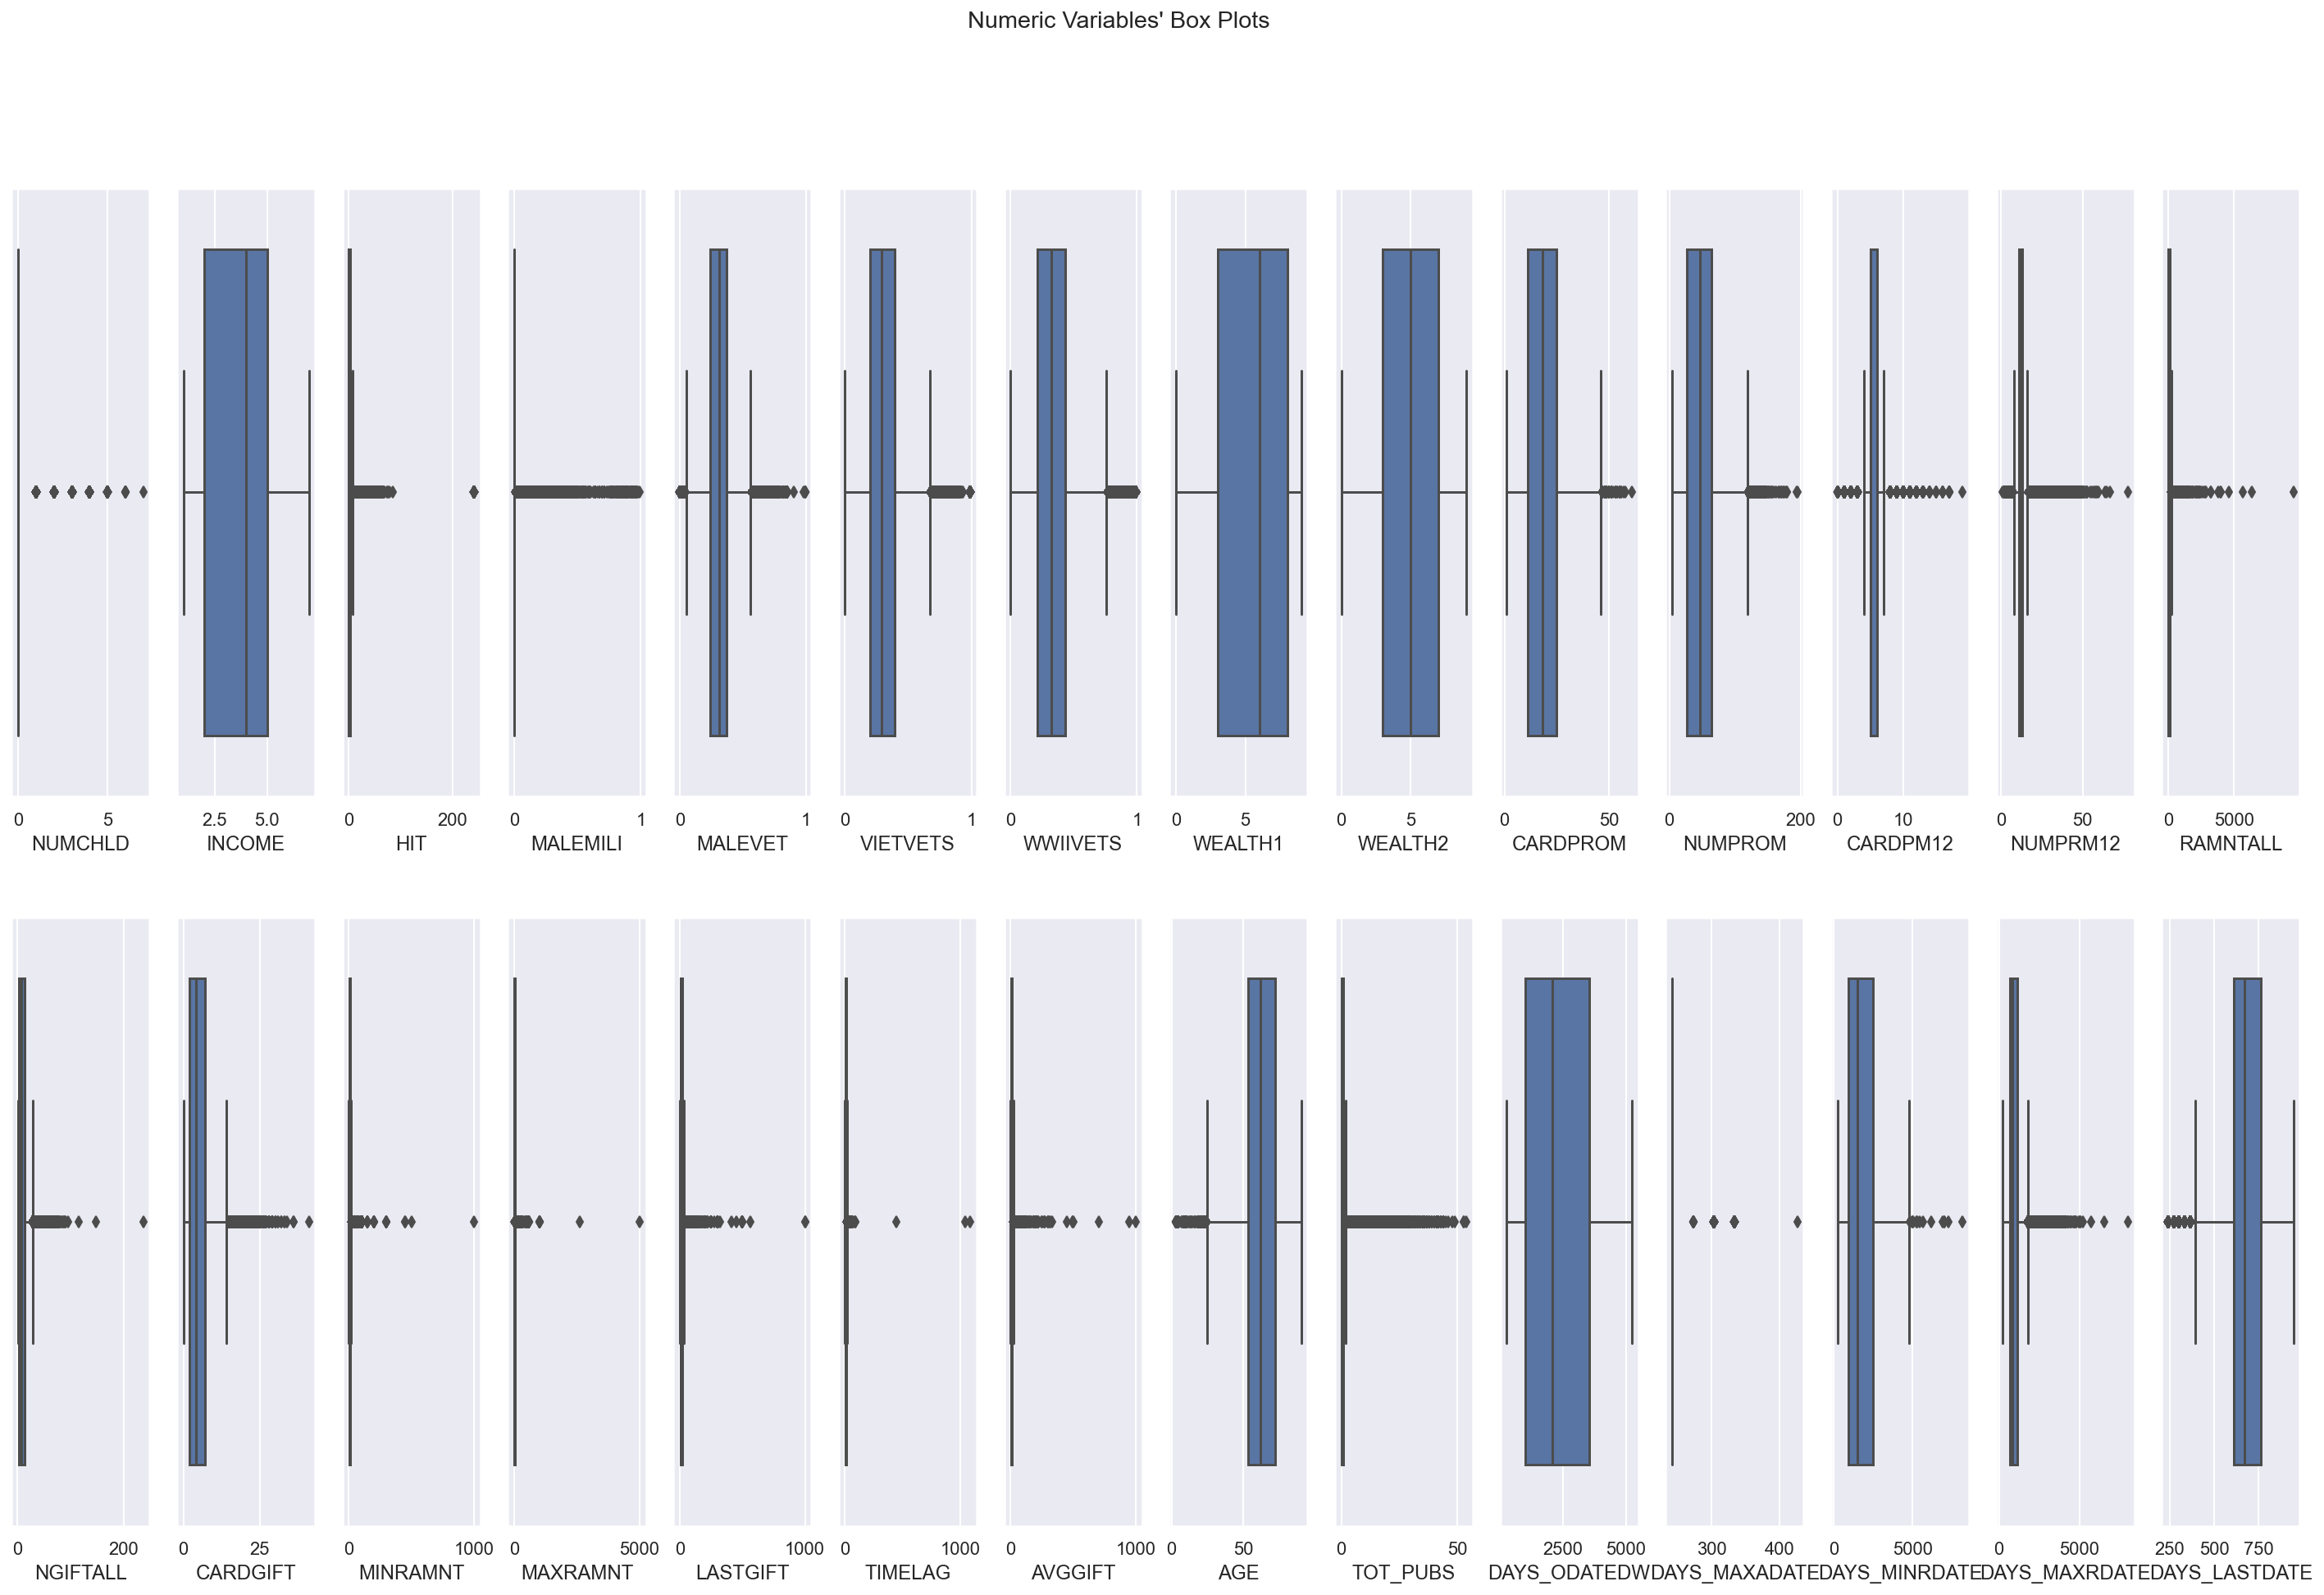

In [78]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features_KNN) / 2), figsize=(25, 15))


for ax, feat in zip(axes.flatten(), metric_features_KNN): 
    sns.boxplot(final_data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [79]:
len(final_data[(final_data["HIT"]>200)==True])

74

In [80]:
final_data["RAMNTALL"].max()

9485.0

In [81]:
len(final_data[(final_data["RAMNTALL"]>8000)==True])

1

In [82]:
final_data["MINRAMNT"].max()

1000.0

In [83]:
len(final_data[(final_data["MINRAMNT"]>900)==True])

1

In [84]:
final_data["MAXRAMNT"].max()

5000.0

In [85]:
len(final_data[(final_data["MAXRAMNT"]>4500)==True])

1

In [86]:
len(final_data[(final_data["TIMELAG"]>900)==True])

2

In [87]:
#IQR will remove way too much data, so we proceed to manual removal of outliers
features_with_outliers = ["HIT","RAMNTALL","TIMELAG"]

In [88]:
# filters1 = (
#     (final_data["HIT"]>200) & (final_data["RAMNTALL"]>8000) & (final_data["NGIFTALL"]>200) & (final_data["MINRAMNT"]>900) 
#      & (final_data["MAXRAMNT"]>4500) & (final_data["LASTGIFT"]>4500) & (final_data["TIMELAG"]>900)
# )

# final_data_1 = final_data[filters1]
# print('Percentage of data kept after removing outliers:', np.round(final_data_1.shape[0] / final_data.shape[0], 4))

In [89]:
# final_data = final_data_ 1

--> This number of outliers is so negligible that it might be better to not even consider removing them 

**STANDARDIZATION**

-- Min Max Scaler --

In [90]:
final_data_scaled = final_data.copy()

In [91]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(final_data_scaled[metric_features_KNN])
scaled_feat

array([[0.        ,        nan, 0.        , ..., 0.20780697, 0.14062099,
        0.60881935],
       [0.14285714, 0.83333333, 0.06639004, ..., 0.15399192, 0.05491404,
        0.60881935],
       [0.        , 0.33333333, 0.00829876, ..., 0.24242041, 0.21503721,
        0.60881935],
       ...,
       [0.        ,        nan, 0.        , ..., 0.04257201, 0.09776751,
        0.17496444],
       [0.        , 1.        , 0.        , ..., 0.28852956, 0.0236079 ,
        0.04409673],
       [0.        , 0.66666667, 0.01244813, ..., 0.37695806, 0.14857583,
        0.08819346]])

In [92]:
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [  0.           1.           0.           0.           0.
   0.           0.           0.           0.           1.
   4.           0.           1.          13.           1.
   0.           0.           5.           0.           0.
   1.28571429   3.           0.         273.         242.
 242.         242.         242.        ] 
 [7.000e+00 7.000e+00 2.410e+02 9.900e-01 9.900e-01 9.900e-01 9.900e-01
 9.000e+00 9.000e+00 6.100e+01 1.950e+02 1.900e+01 7.800e+01 9.485e+03
 2.370e+02 4.100e+01 1.000e+03 5.000e+03 1.000e+03 1.088e+03 1.000e+03
 9.000e+01 5.400e+01 5.236e+03 4.260e+02 8.158e+03 8.036e+03 9.450e+02]


In [93]:
final_data_scaled[metric_features_KNN] = scaled_feat

In [94]:
final_data_scaled

NUMCHLD    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0      0.000000       NaN  0.000000  0.000000  0.393939  0.343434  0.181818   
1      0.142857  0.833333  0.066390  0.000000  0.151515  0.555556  0.111111   
2      0.000000  0.333333  0.008299  0.000000  0.202020  0.292929  0.333333   
3      0.000000  0.000000  0.008299  0.000000  0.232323  0.141414  0.313131   
4      0.142857  0.333333  0.248963  0.010101  0.282828  0.090909  0.535354   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000000       NaN  0.000000  0.141414  0.363636  0.474747  0.111111   
95408  0.142857  1.000000  0.004149  0.000000  0.313131  0.434343  0.191919   
95409  0.000000       NaN  0.000000  0.000000  0.181818  0.464646  0.202020   
95410  0.000000  1.000000  0.000000  0.000000  0.282828  0.353535  0.202020   
95411  0.000000  0.666667  0.012448  0.010101  0.333333  0.222222  0.272727   

       MAJOR   WEALTH1   WEALTH2  CARDPROM   NUMPROM  CARDPM12  NUMPRM12  \
0          0       NaN  0.555556  0.433333  0.366492  0.315789  0.168831   
1          0  1.000000  1.000000  0.183333  0.146597  0.315789  0.155844   
2          0  0.111111  0.111111  0.416667  0.308901  0.315789  0.168831   
3          0  0.444444  0.000000  0.433333  0.324607  0.315789  0.168831   
4          0  0.222222       NaN  0.700000  0.570681  0.526316  0.311688   
...      ...       ...       ...       ...       ...       ...       ...   
95407      0       NaN       NaN  0.083333  0.052356  0.263158  0.142857   
95408      0  1.000000       NaN  0.050000  0.031414  0.157895  0.090909   
95409      0       NaN       NaN  0.216667  0.151832  0.368421  0.207792   
95410      0       NaN  0.777778  0.583333  0.643979  0.473684  0.389610   
95411      1  0.888889  0.888889  0.516667  0.706806  0.315789  0.441558   

       RAMNTALL  NGIFTALL  CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
0      0.023965  0.127119  0.341463     0.005  0.001401     0.010  0.003676   
1      0.003590  0.008475  0.024390     0.010  0.004004     0.025  0.016544   
2      0.019954  0.110169  0.341463     0.002  0.002202     0.005  0.011029   
3      0.010135  0.063559  0.170732     0.002  0.001201     0.010  0.008272   
4      0.025443  0.152542  0.195122     0.003  0.002002     0.015  0.012868   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.001267  0.000000  0.000000     0.025  0.004004     0.025  0.005515   
95408  0.000739  0.000000  0.000000     0.020  0.003003     0.020  0.005515   
95409  0.004751  0.025424  0.097561     0.003  0.001001     0.010  0.002757   
95410  0.051204  0.169492  0.439024     0.005  0.003203     0.018  0.003676   
95411  0.397171  0.161017  0.268293     0.010  0.039239     0.100  0.005515   

        AVGGIFT  RFA_2F  RFA_2A       AGE  TOT_PUBS  DAYS_ODATEDW  \
0      0.006465       4       5  0.689655  0.000000      0.588757   
1      0.014399       2       7  0.517241  0.203704      0.220834   
2      0.006204       4       5  0.678161  0.037037      0.515213   
3      0.005534       4       5  0.793103  0.018519      0.736047   
4      0.005586       2       6  0.885057  0.388889      0.809591   
...         ...     ...     ...       ...       ...           ...   
95407  0.023745       1       7  0.678161  0.000000      0.073746   
95408  0.018738       1       6  0.540230  0.018519      0.073746   
95409  0.007009       3       5  0.678161  0.000000      0.147290   
95410  0.010875       4       6  0.655172  0.000000      0.809591   
95411  0.095632       1       7  0.908046  0.037037      0.662503   

       DAYS_MAXADATE  DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE  x0_A  x0_F  \
0                0.0       0.207807       0.140621       0.608819     0     0   
1                0.0       0.153992       0.054914       0.608819     1     0   
2                0.0       0.242420       0.215037       0.608819     0     0   
3                0.0       0.426983       0.

**Feature Removal by High Correlation Factor**

<AxesSubplot:>

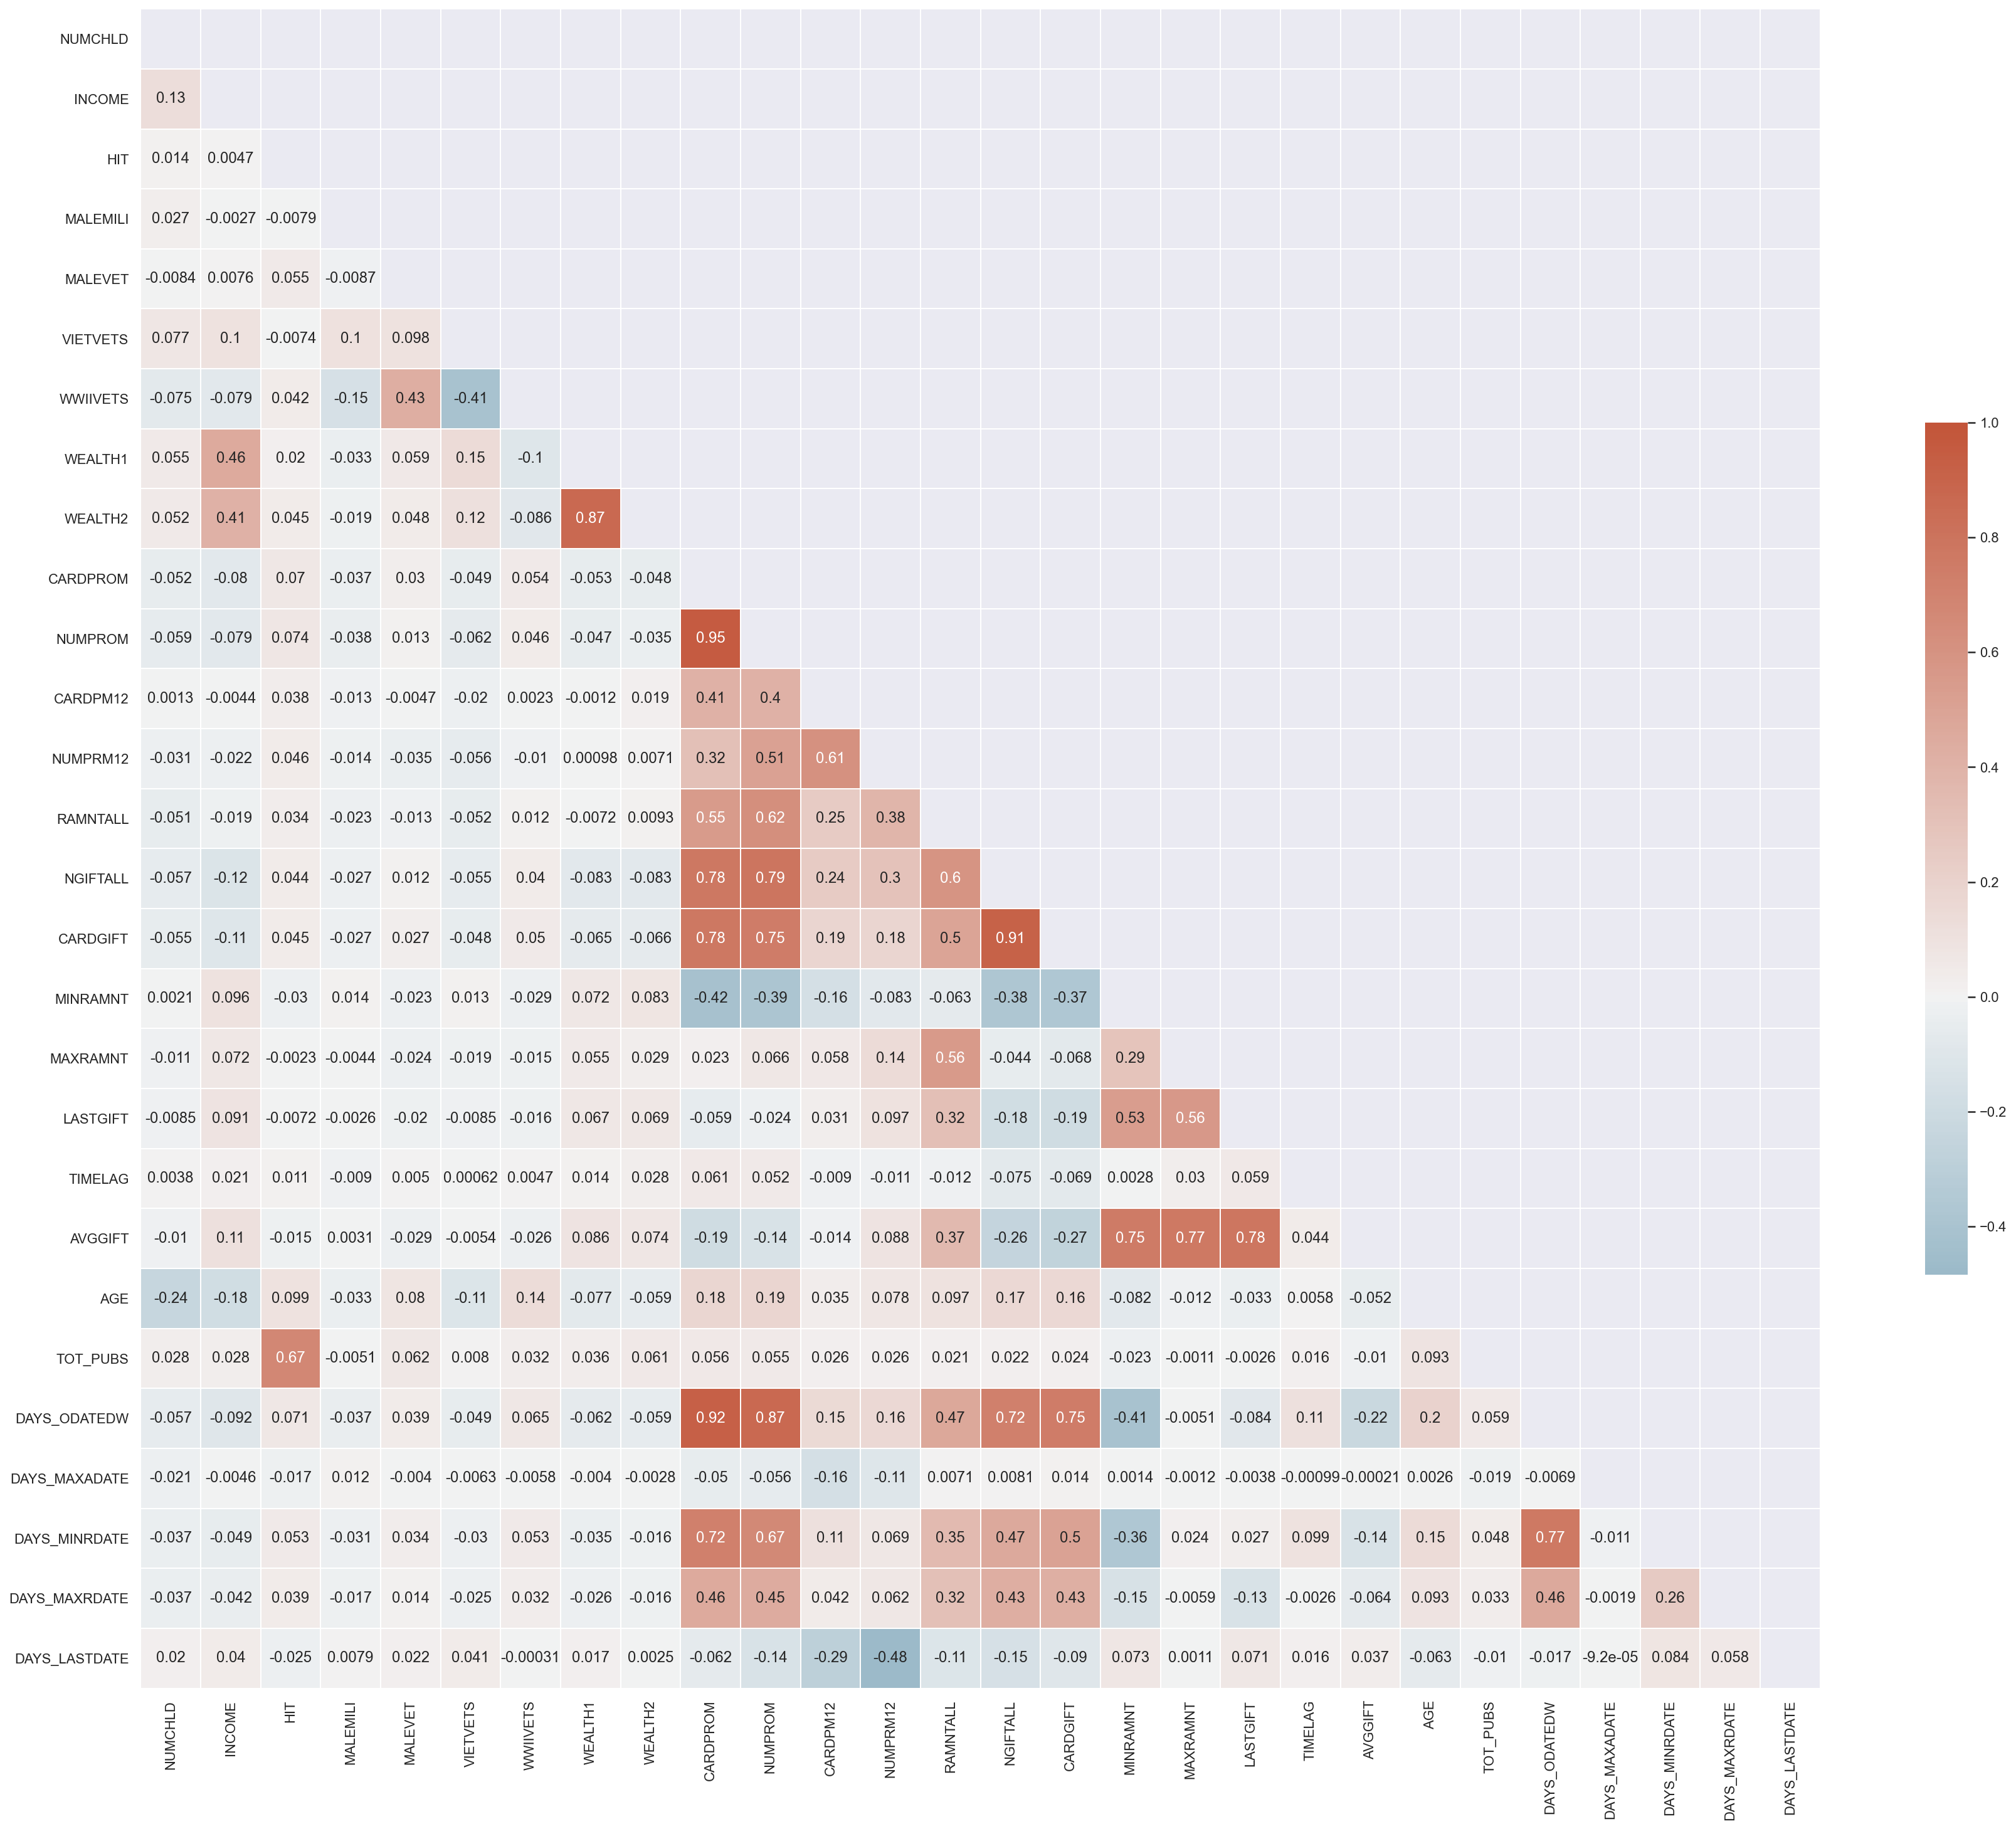

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
corr = final_data_scaled[metric_features_KNN].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [96]:
print(corr["WEALTH1"].abs().sum())
print(corr["WEALTH2"].abs().sum())

3.5506689073300866
3.4085774603046994


In [97]:
# We keep Wealth2 since it has less correlation values with all other variables and has fewer missing values
# Similar logic is applied to future decisions in feature removal by high correlation factor (we also consider that if one
# variable can explain more than one feature then we remove the multiple ones that can be translated into the latter)
final_data_scaled = final_data_scaled.drop(columns='WEALTH1')
metric_features_KNN.remove('WEALTH1')

<AxesSubplot:>

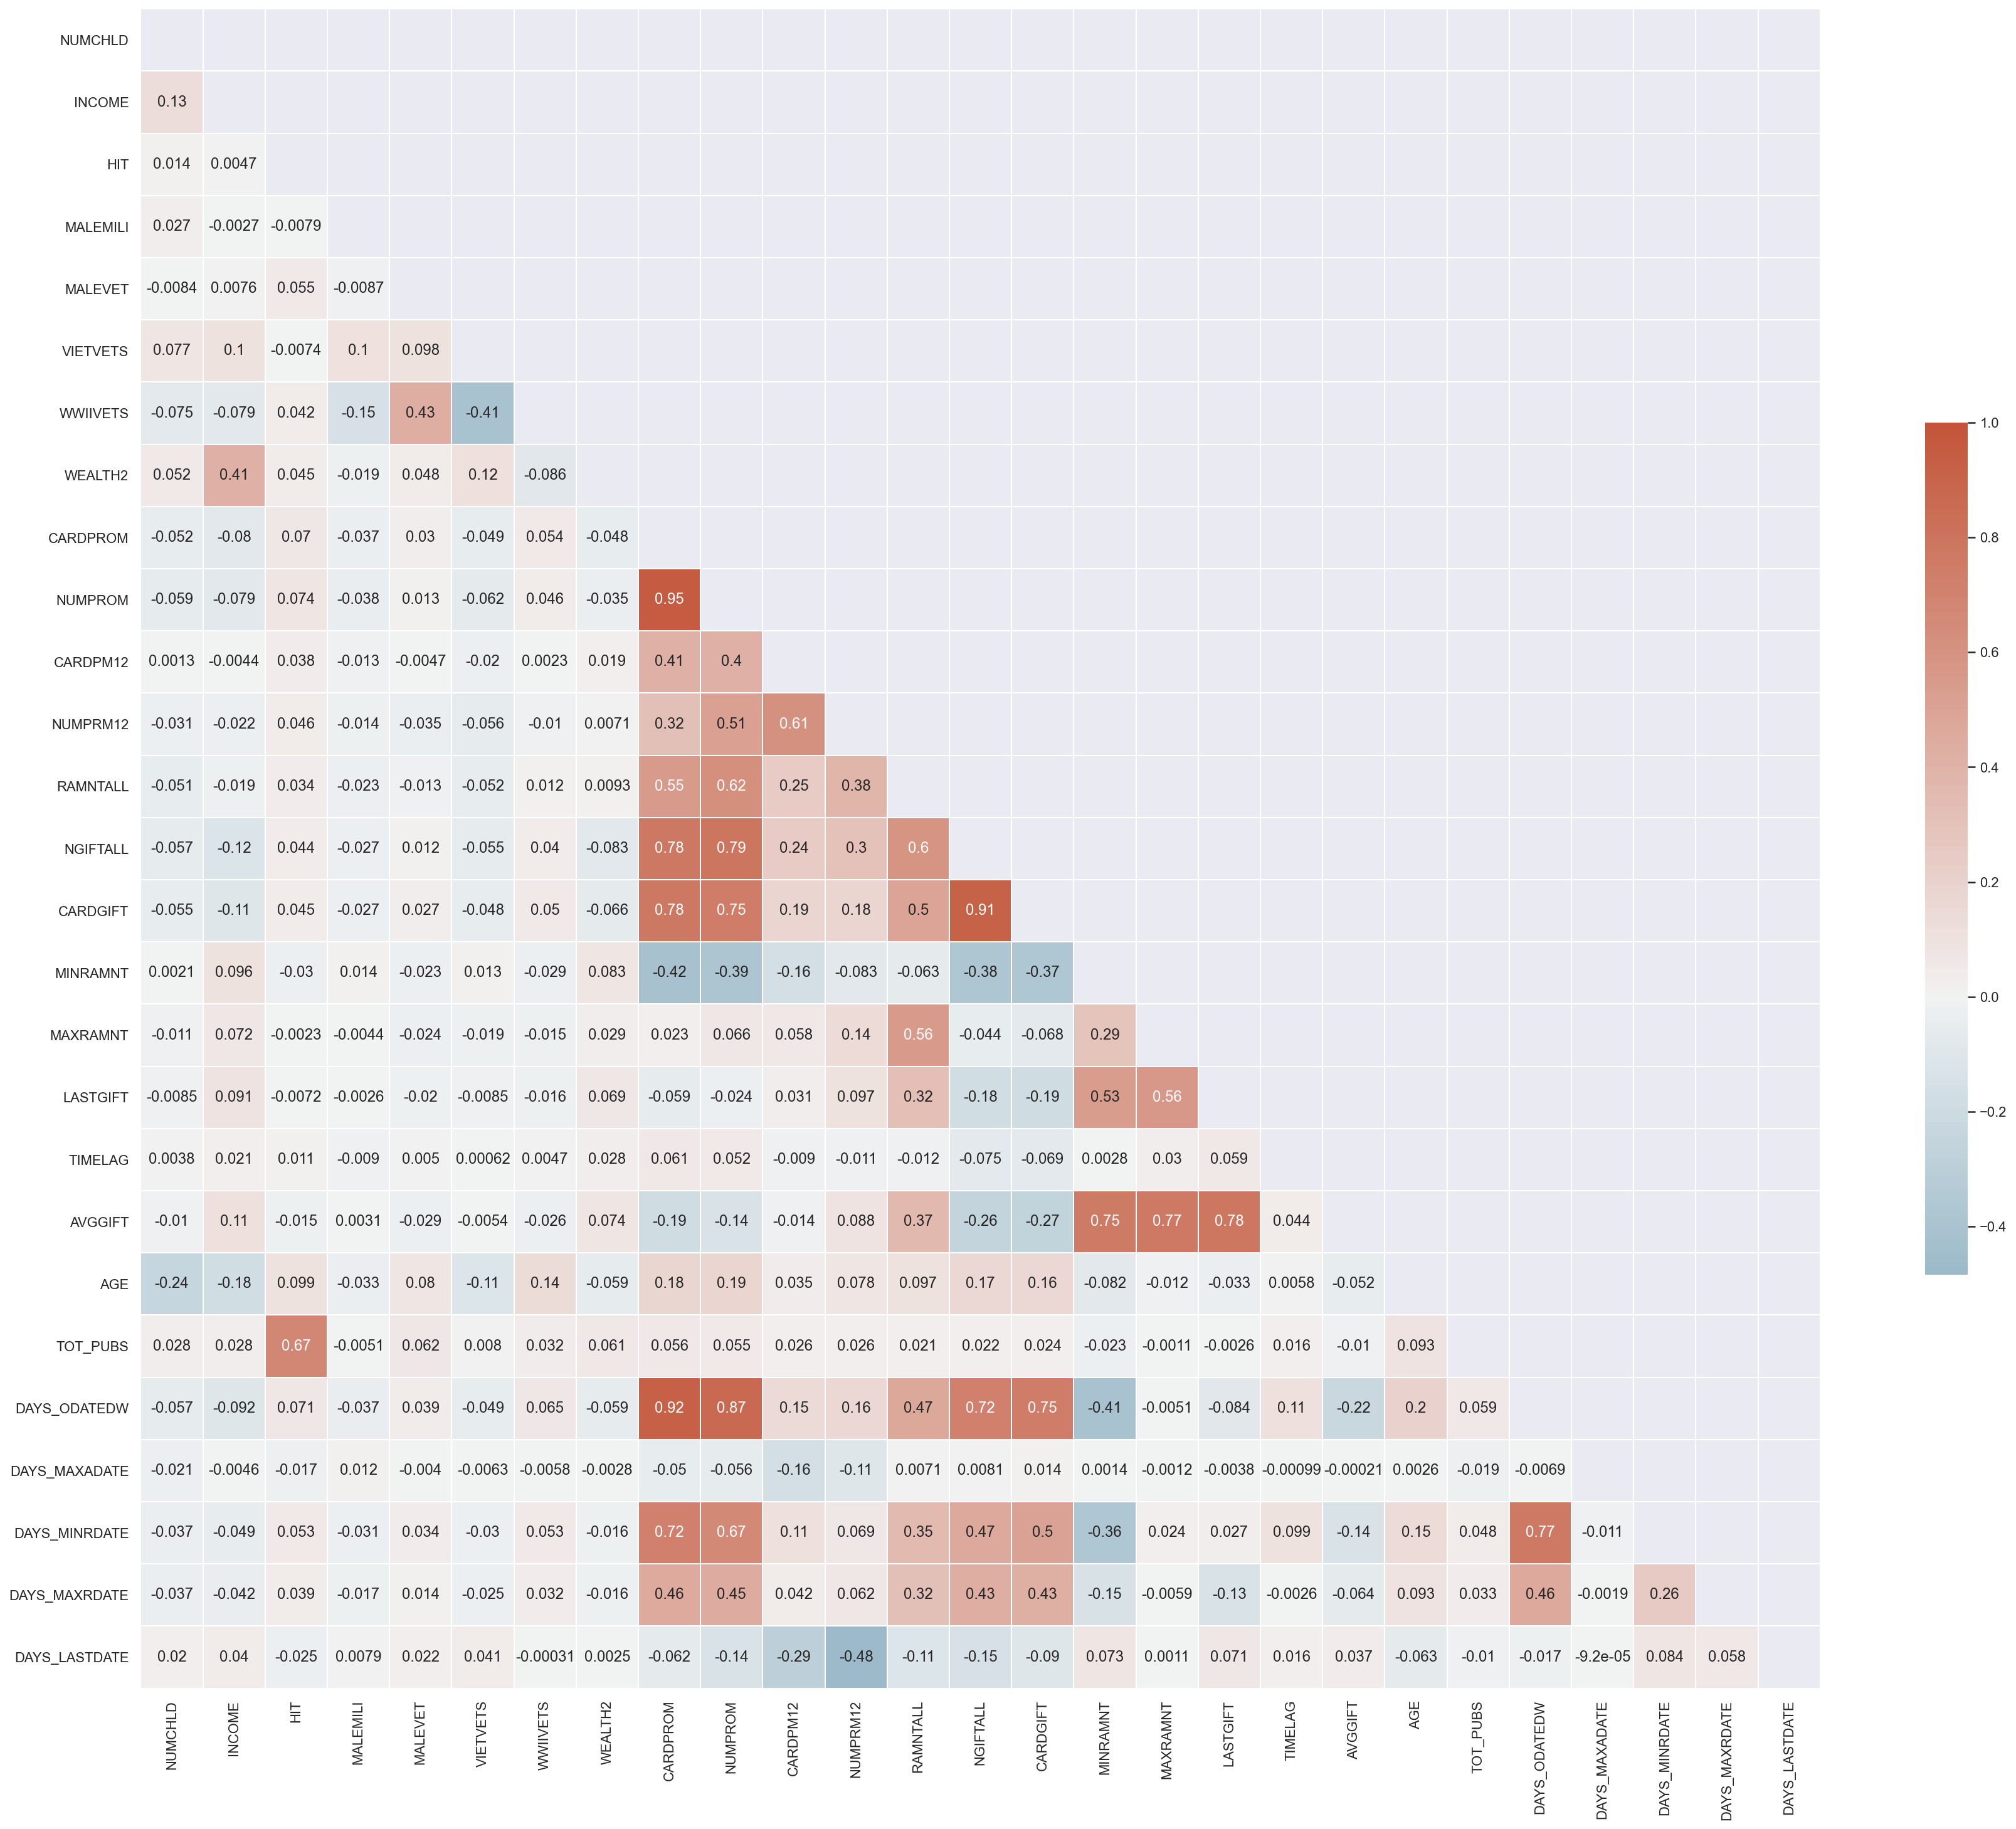

In [98]:
sns.set_theme()
corr = final_data_scaled[metric_features_KNN].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [99]:
final_data_scaled = final_data_scaled.drop(columns = "NUMPROM")
final_data_scaled = final_data_scaled.drop(columns = "DAYS_ODATEDW")
metric_features_KNN.remove('NUMPROM')
metric_features_KNN.remove('DAYS_ODATEDW')

<AxesSubplot:>

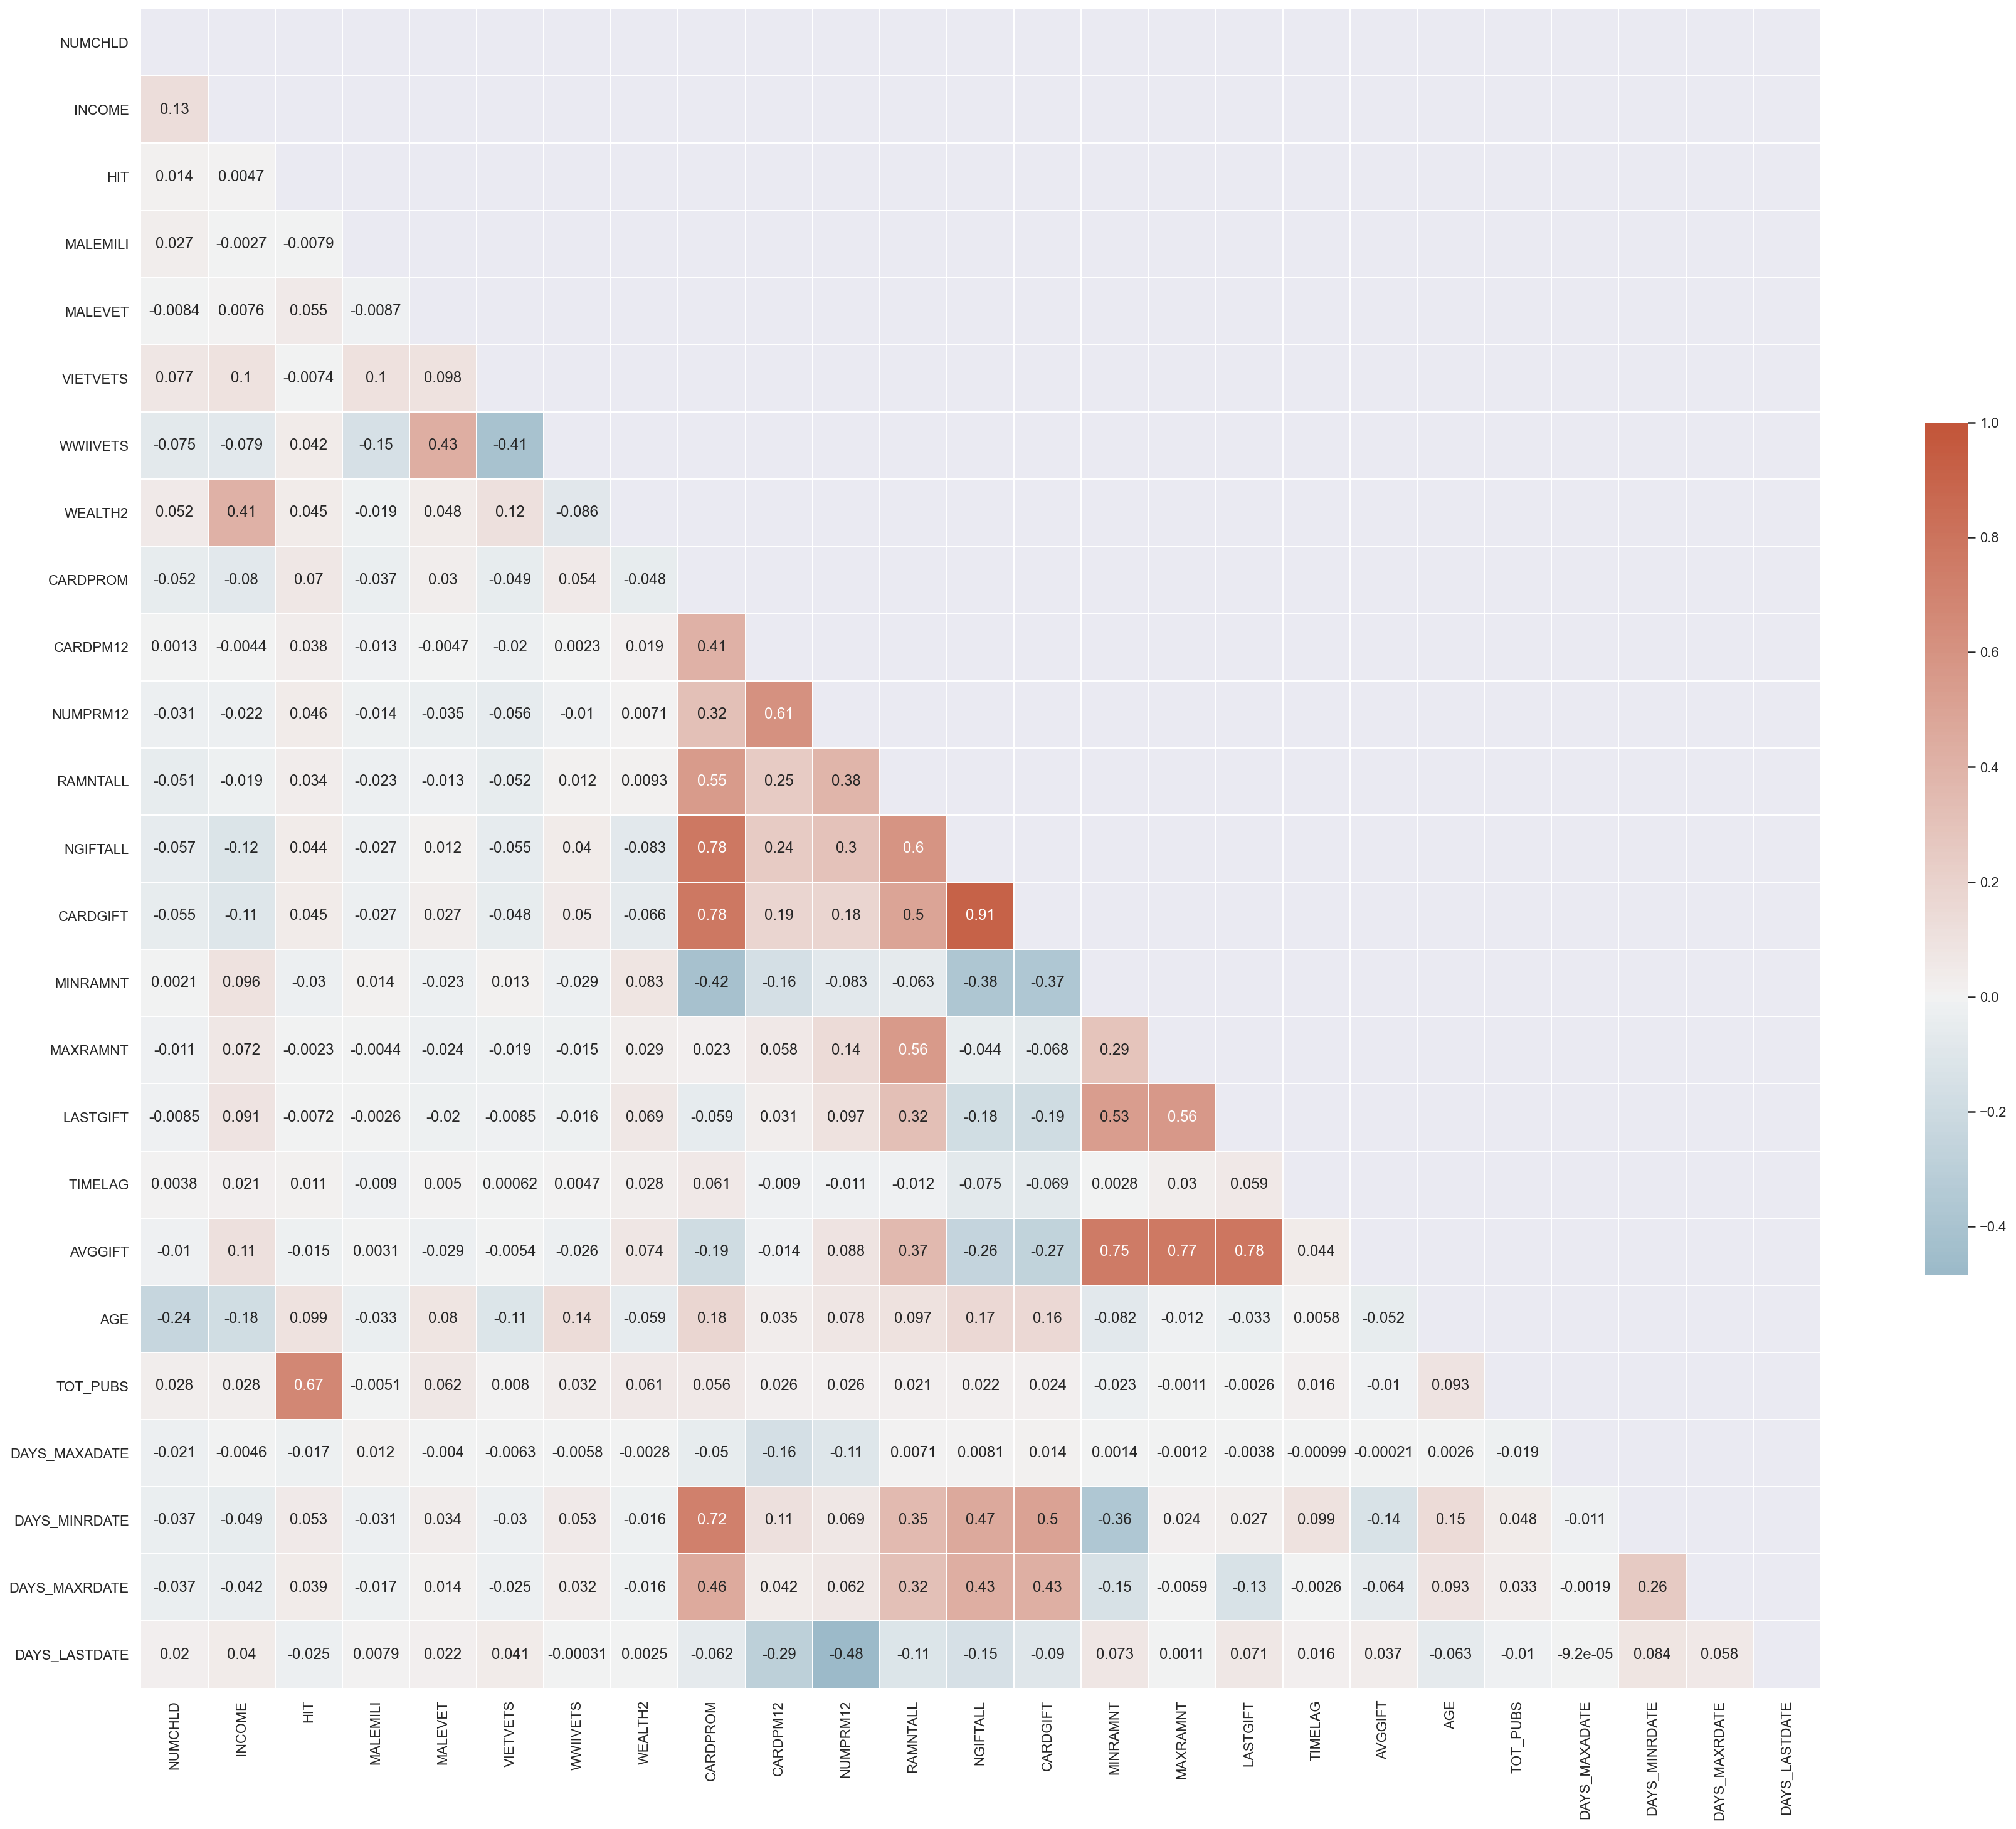

In [100]:
sns.set_theme()
corr = final_data_scaled[metric_features_KNN].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
final_data_scaled = final_data_scaled.drop(columns = "NGIFTALL")
final_data_scaled = final_data_scaled.drop(columns = "CARDGIFT")
metric_features_KNN.remove('NGIFTALL')
metric_features_KNN.remove('CARDGIFT')

<AxesSubplot:>

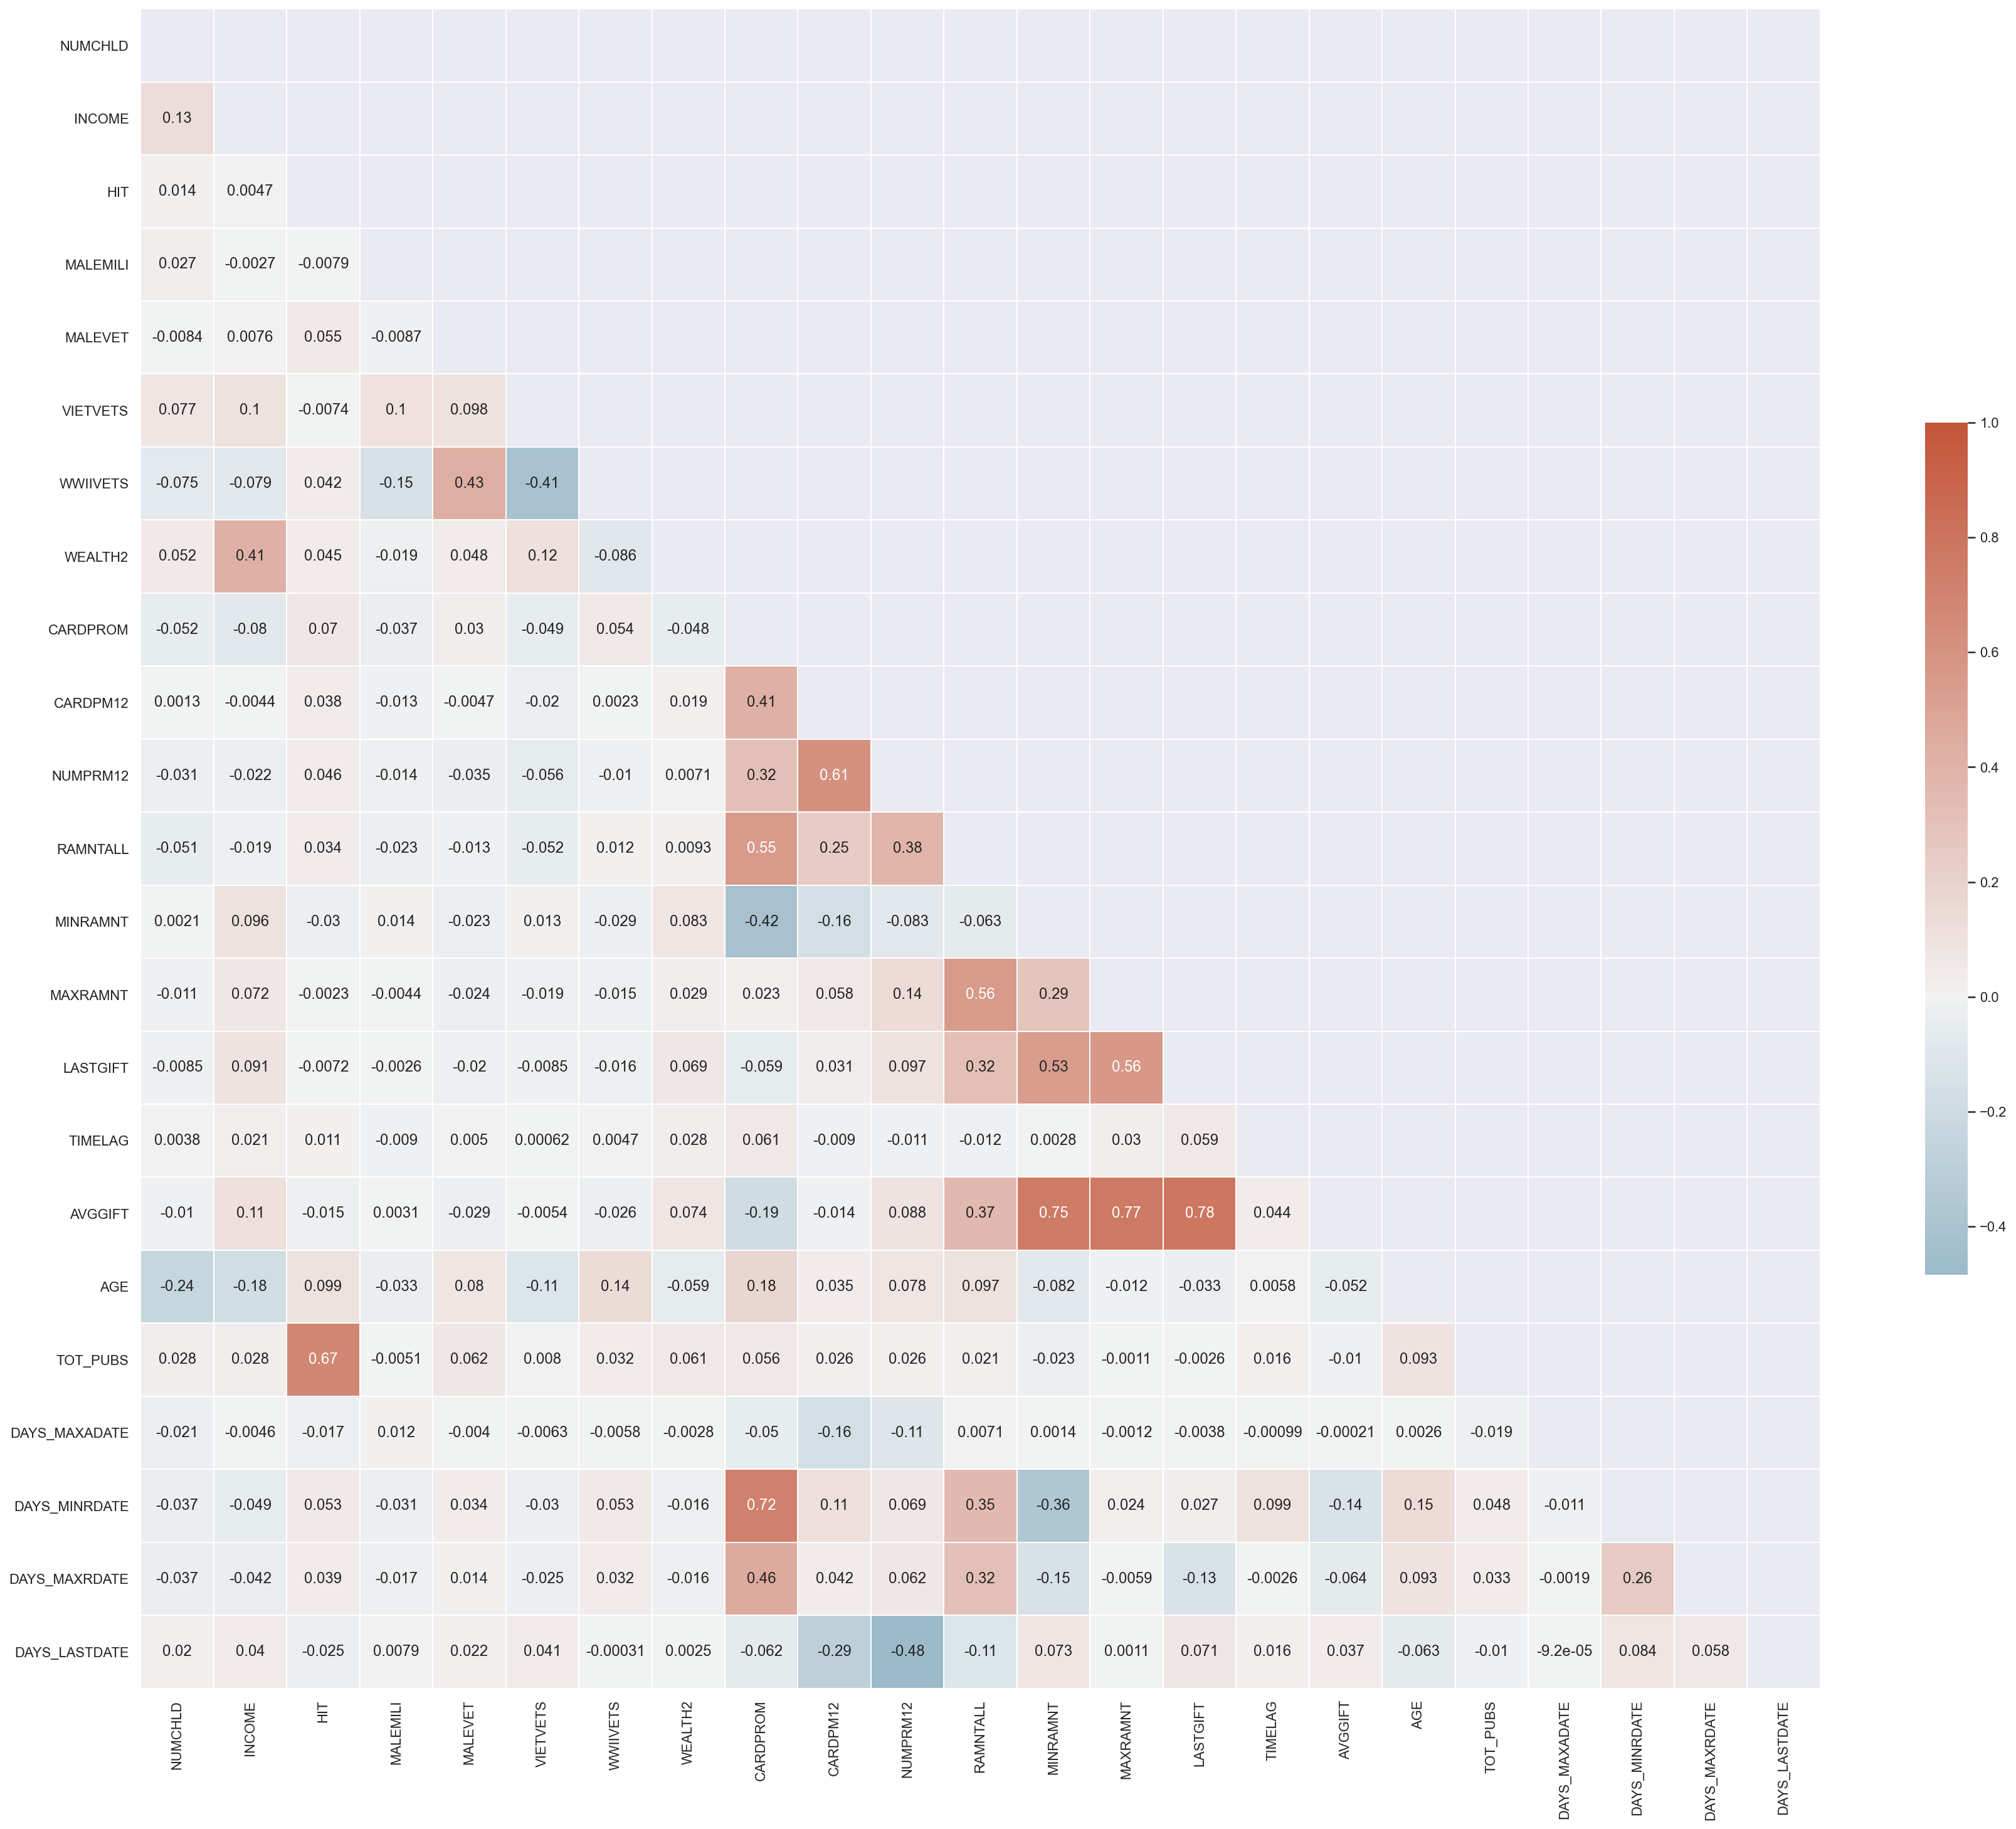

In [102]:
sns.set_theme()
corr = final_data_scaled[metric_features_KNN].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
final_data_scaled = final_data_scaled.drop(columns = "MINRAMNT")
final_data_scaled = final_data_scaled.drop(columns = "MAXRAMNT")
final_data_scaled = final_data_scaled.drop(columns = "LASTGIFT")
metric_features_KNN.remove('MINRAMNT')
metric_features_KNN.remove('MAXRAMNT')
metric_features_KNN.remove('LASTGIFT')

<AxesSubplot:>

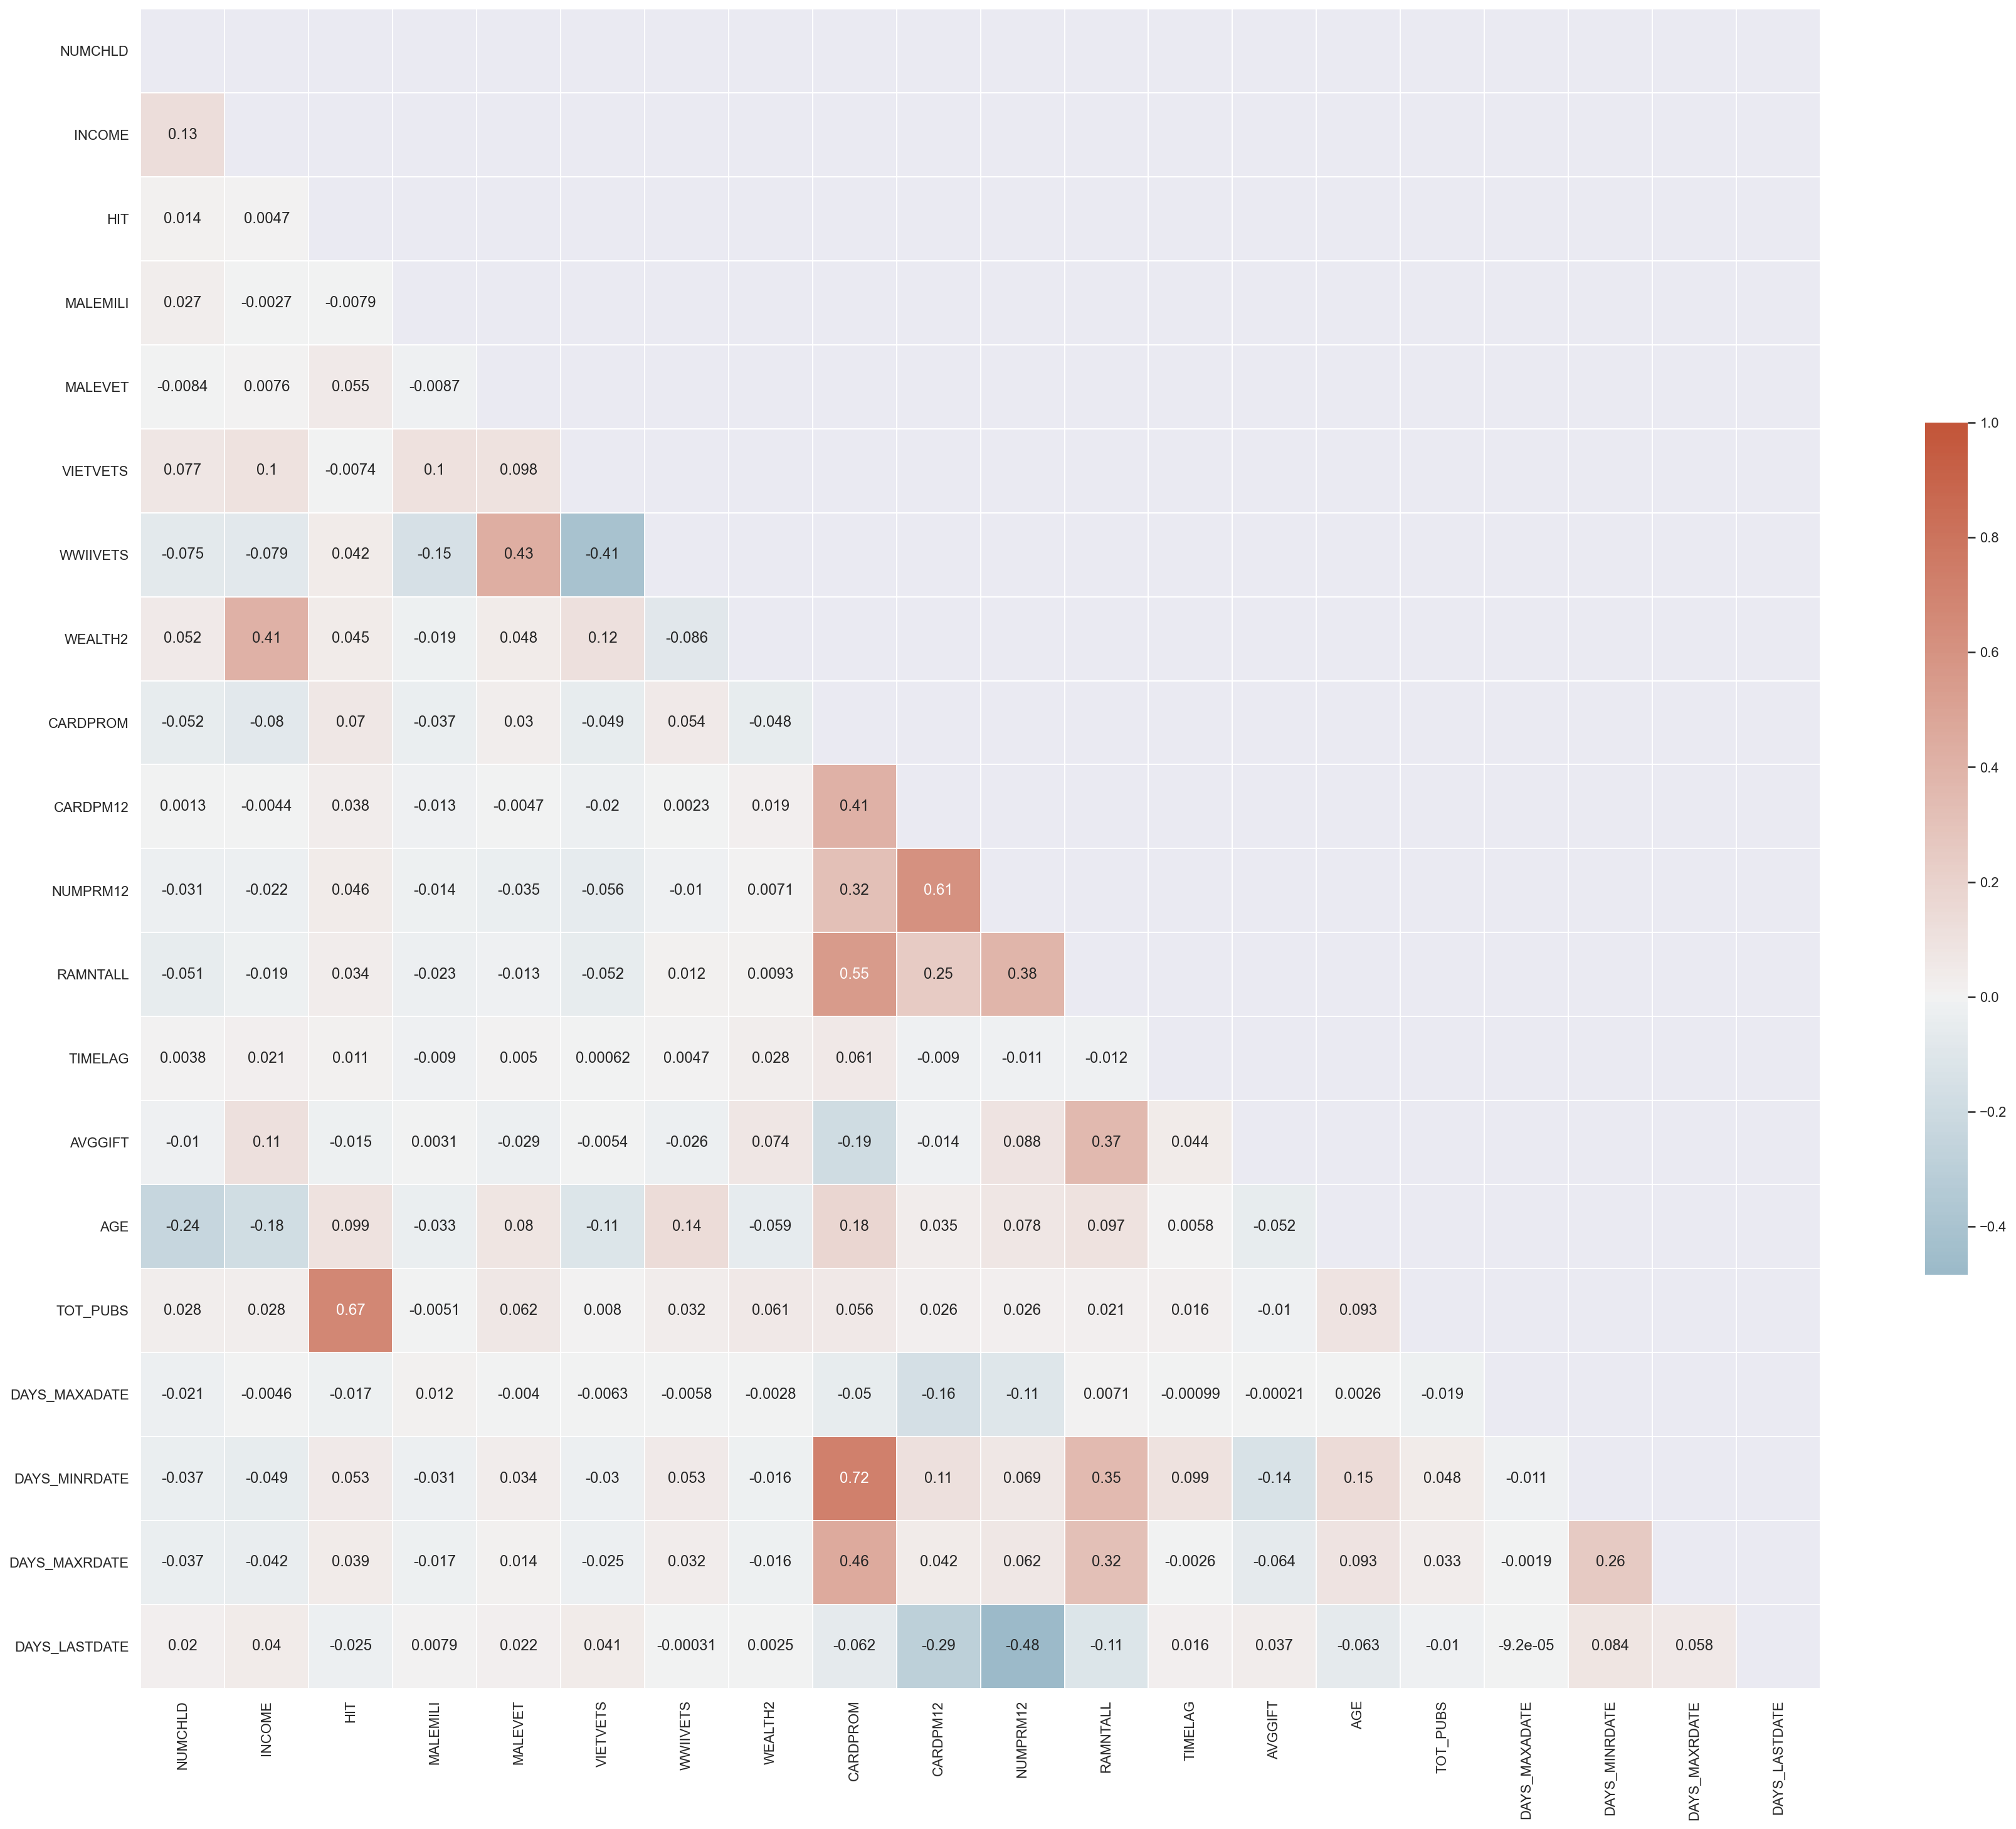

In [104]:
sns.set_theme()
corr = final_data_scaled[metric_features_KNN].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [105]:
final_data_scaled

NUMCHLD    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0      0.000000       NaN  0.000000  0.000000  0.393939  0.343434  0.181818   
1      0.142857  0.833333  0.066390  0.000000  0.151515  0.555556  0.111111   
2      0.000000  0.333333  0.008299  0.000000  0.202020  0.292929  0.333333   
3      0.000000  0.000000  0.008299  0.000000  0.232323  0.141414  0.313131   
4      0.142857  0.333333  0.248963  0.010101  0.282828  0.090909  0.535354   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000000       NaN  0.000000  0.141414  0.363636  0.474747  0.111111   
95408  0.142857  1.000000  0.004149  0.000000  0.313131  0.434343  0.191919   
95409  0.000000       NaN  0.000000  0.000000  0.181818  0.464646  0.202020   
95410  0.000000  1.000000  0.000000  0.000000  0.282828  0.353535  0.202020   
95411  0.000000  0.666667  0.012448  0.010101  0.333333  0.222222  0.272727   

       MAJOR   WEALTH2  CARDPROM  CARDPM12  NUMPRM12  RAMNTALL   TIMELAG  \
0          0  0.555556  0.433333  0.315789  0.168831  0.023965  0.003676   
1          0  1.000000  0.183333  0.315789  0.155844  0.003590  0.016544   
2          0  0.111111  0.416667  0.315789  0.168831  0.019954  0.011029   
3          0  0.000000  0.433333  0.315789  0.168831  0.010135  0.008272   
4          0       NaN  0.700000  0.526316  0.311688  0.025443  0.012868   
...      ...       ...       ...       ...       ...       ...       ...   
95407      0       NaN  0.083333  0.263158  0.142857  0.001267  0.005515   
95408      0       NaN  0.050000  0.157895  0.090909  0.000739  0.005515   
95409      0       NaN  0.216667  0.368421  0.207792  0.004751  0.002757   
95410      0  0.777778  0.583333  0.473684  0.389610  0.051204  0.003676   
95411      1  0.888889  0.516667  0.315789  0.441558  0.397171  0.005515   

        AVGGIFT  RFA_2F  RFA_2A       AGE  TOT_PUBS  DAYS_MAXADATE  \
0      0.006465       4       5  0.689655  0.000000            0.0   
1      0.014399       2       7  0.517241  0.203704            0.0   
2      0.006204       4       5  0.678161  0.037037            0.0   
3      0.005534       4       5  0.793103  0.018519            0.0   
4      0.005586       2       6  0.885057  0.388889            0.0   
...         ...     ...     ...       ...       ...            ...   
95407  0.023745       1       7  0.678161  0.000000            0.0   
95408  0.018738       1       6  0.540230  0.018519            0.0   
95409  0.007009       3       5  0.678161  0.000000            0.0   
95410  0.010875       4       6  0.655172  0.000000            0.0   
95411  0.095632       1       7  0.908046  0.037037            0.0   

       DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE  x0_A  x0_F  x0_L  x0_N  \
0           0.207807       0.140621       0.608819     0     0     0     0   
1           0.153992       0.054914       0.608819     1     0     0     0   
2           0.242420       0.215037       0.608819     0     0     0     0   
3           0.426983       0.105594       0.608819     0     0     0     0   
4           0.153992       0.050937       0.564723     1     0     0     0   
...              ...            ...            ...   ...   ...   ...   ...   
95407       0.046235       0.046959       0.520626     0     1     0     0   
95408       0.042572       0.043238       0.479374     1     0     0     0   
95409       0.042572       0.097768       0.174964     0     0     0     0   
95410       0.288530       0.023608       0.044097     0     0     0     0   
95411       0.376958       0.148576       0.088193     1     0     0     0   

       x0_S  
0         1  
1         0  
2         1  
3         1  
4         0  
...     ...  
95407     0  
95408     0  
95409     1  
95410     1  
95411     0  

[95412 rows x 28 columns]

**MISSING VALUES IMPUTATION** 2nd part

-- KNN Imputer -- 

In [106]:
KNN_data = final_data_scaled.copy()

In [107]:
nans_index = KNN_data.isna().any(axis=1)
KNN_data[nans_index]

NUMCHLD    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0      0.000000       NaN  0.000000  0.000000  0.393939  0.343434  0.181818   
4      0.142857  0.333333  0.248963  0.010101  0.282828  0.090909  0.535354   
5      0.000000       NaN  0.000000  0.000000  0.262626  0.363636  0.232323   
7      0.000000  0.166667  0.004149  0.000000  0.343434  0.363636  0.121212   
9      0.000000       NaN  0.000000  0.000000  0.282828  0.515152  0.141414   
...         ...       ...       ...       ...       ...       ...       ...   
95402  0.000000       NaN  0.000000  0.000000  0.202020  0.212121  0.636364   
95405  0.000000       NaN  0.000000  0.000000  0.414141  0.121212  0.696970   
95407  0.000000       NaN  0.000000  0.141414  0.363636  0.474747  0.111111   
95408  0.142857  1.000000  0.004149  0.000000  0.313131  0.434343  0.191919   
95409  0.000000       NaN  0.000000  0.000000  0.181818  0.464646  0.202020   

       MAJOR   WEALTH2  CARDPROM  CARDPM12  NUMPRM12  RAMNTALL   TIMELAG  \
0          0  0.555556  0.433333  0.315789  0.168831  0.023965  0.003676   
4          0       NaN  0.700000  0.526316  0.311688  0.025443  0.012868   
5          0       NaN  0.233333  0.315789  0.142857  0.004012  0.005515   
7          0       NaN  0.216667  0.315789  0.142857  0.001900  0.005515   
9          0  1.000000  0.166667  0.210526  0.103896  0.001584  0.006434   
...      ...       ...       ...       ...       ...       ...       ...   
95402      0       NaN  0.166667  0.315789  0.168831  0.002745  0.001838   
95405      0       NaN  0.266667  0.315789  0.155844  0.007073  0.017463   
95407      0       NaN  0.083333  0.263158  0.142857  0.001267  0.005515   
95408      0       NaN  0.050000  0.157895  0.090909  0.000739  0.005515   
95409      0       NaN  0.216667  0.368421  0.207792  0.004751  0.002757   

        AVGGIFT  RFA_2F  RFA_2A       AGE  TOT_PUBS  DAYS_MAXADATE  \
0      0.006465       4       5  0.689655  0.000000            0.0   
4      0.005586       2       6  0.885057  0.388889            0.0   
5      0.011479       1       6  0.678161  0.000000            0.0   
7      0.004921       3       5  0.678161  0.000000            0.0   
9      0.008058       1       6  0.747126  0.000000            0.0   
...         ...     ...     ...       ...       ...            ...   
95402  0.008475       3       5  0.678161  0.000000            0.0   
95405  0.025414       1       7  0.678161  0.000000            0.0   
95407  0.023745       1       7  0.678161  0.000000            0.0   
95408  0.018738       1       6  0.540230  0.018519            0.0   
95409  0.007009       3       5  0.678161  0.000000            0.0   

       DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE  x0_A  x0_F  x0_L  x0_N  \
0           0.207807       0.140621       0.608819     0     0     0     0   
4           0.153992       0.050937       0.564723     1     0     0     0   
5           0.119505       0.101745       0.869132     1     0     0     0   
7           0.073396       0.070567       0.782361     1     0     0     0   
9           0.157782       0.086220       0.955903     1     0     0     0   
...              ...            ...            ...   ...   ...   ...   ...   
95402       0.096261       0.054914       0.608819     1     0     0     0   
95405       0.069480       0.101745       0.782361     1     0     0     0   
95407       0.046235       0.046959       0.520626     0     1     0     0   
95408       0.042572       0.043238       0.479374     1     0     0     0   
95409       0.042572       0.097768       0.174964     0     0     0     0   

       x0_S  
0         1  
4         0  
5         0  
7         0  
9         0  
...     ...  
95402     0  
95405     0  
95407     0  
95408     0  
95409     1  

[54674 rows x 28 columns]

In [108]:
# KNNImputer - only works for numerical varaibles
imputer = KNNImputer(n_neighbors=5, weights="uniform")
KNN_data[metric_features_KNN] = imputer.fit_transform(KNN_data[metric_features_KNN])

In [109]:
# See rows with NaNs imputed
KNN_data.loc[nans_index, metric_features_KNN]

NUMCHLD    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0      0.000000  0.566667  0.000000  0.000000  0.393939  0.343434  0.181818   
4      0.142857  0.333333  0.248963  0.010101  0.282828  0.090909  0.535354   
5      0.000000  0.600000  0.000000  0.000000  0.262626  0.363636  0.232323   
7      0.000000  0.166667  0.004149  0.000000  0.343434  0.363636  0.121212   
9      0.000000  0.733333  0.000000  0.000000  0.282828  0.515152  0.141414   
...         ...       ...       ...       ...       ...       ...       ...   
95402  0.000000  0.733333  0.000000  0.000000  0.202020  0.212121  0.636364   
95405  0.000000  0.666667  0.000000  0.000000  0.414141  0.121212  0.696970   
95407  0.000000  0.433333  0.000000  0.141414  0.363636  0.474747  0.111111   
95408  0.142857  1.000000  0.004149  0.000000  0.313131  0.434343  0.191919   
95409  0.000000  0.433333  0.000000  0.000000  0.181818  0.464646  0.202020   

        WEALTH2  CARDPROM  CARDPM12  NUMPRM12  RAMNTALL   TIMELAG   AVGGIFT  \
0      0.555556  0.433333  0.315789  0.168831  0.023965  0.003676  0.006465   
4      0.600000  0.700000  0.526316  0.311688  0.025443  0.012868  0.005586   
5      0.488889  0.233333  0.315789  0.142857  0.004012  0.005515  0.011479   
7      0.466667  0.216667  0.315789  0.142857  0.001900  0.005515  0.004921   
9      1.000000  0.166667  0.210526  0.103896  0.001584  0.006434  0.008058   
...         ...       ...       ...       ...       ...       ...       ...   
95402  0.377778  0.166667  0.315789  0.168831  0.002745  0.001838  0.008475   
95405  0.511111  0.266667  0.315789  0.155844  0.007073  0.017463  0.025414   
95407  0.488889  0.083333  0.263158  0.142857  0.001267  0.005515  0.023745   
95408  0.600000  0.050000  0.157895  0.090909  0.000739  0.005515  0.018738   
95409  0.555556  0.216667  0.368421  0.207792  0.004751  0.002757  0.007009   

            AGE  TOT_PUBS  DAYS_MAXADATE  DAYS_MINRDATE  DAYS_MAXRDATE  \
0      0.689655  0.000000            0.0       0.207807       0.140621   
4      0.885057  0.388889            0.0       0.153992       0.050937   
5      0.678161  0.000000            0.0       0.119505       0.101745   
7      0.678161  0.000000            0.0       0.073396       0.070567   
9      0.747126  0.000000            0.0       0.157782       0.086220   
...         ...       ...            ...            ...            ...   
95402  0.678161  0.000000            0.0       0.096261       0.054914   
95405  0.678161  0.000000            0.0       0.069480       0.101745   
95407  0.678161  0.000000            0.0       0.046235       0.046959   
95408  0.540230  0.018519            0.0       0.042572       0.043238   
95409  0.678161  0.000000            0.0       0.042572       0.097768   

       DAYS_LASTDATE  
0           0.608819  
4           0.564723  
5           0.869132  
7           0.782361  
9           0.955903  
...              ...  
95402       0.608819  
95405       0.782361  
95407       0.520626  
95408       0.479374  
95409       0.174964  

[54674 rows x 20 columns]

In [110]:
pd.options.display.max_rows=476
missing = KNN_data.isnull().sum()[KNN_data.isnull().sum()>0]
missing_percent = round(missing/KNN_data.shape[0]*100,2)
missing_percent

Series([], dtype: float64)

In [111]:
final_data_scaled["INCOME"].value_counts()

0.666667    15451
0.166667    13114
0.500000    12732
0.000000     9022
0.333333     8558
0.833333     7778
1.000000     7471
Name: INCOME, dtype: int64

In [112]:
KNN_data["INCOME"].value_counts()

0.666667    15830
0.500000    14072
0.166667    13364
0.333333     9268
0.000000     9024
0.833333     7803
1.000000     7471
0.400000     1579
0.566667     1350
0.433333     1343
0.533333     1285
0.300000      970
0.466667      890
0.466667      856
0.366667      833
0.600000      819
0.633333      688
0.333333      678
0.266667      503
0.700000      498
0.366667      492
0.266667      449
0.233333      401
0.433333      401
0.200000      384
0.666667      353
0.233333      350
0.600000      273
0.533333      267
0.733333      262
0.500000      250
0.366667      245
0.633333      187
0.133333      174
0.300000      159
0.100000      146
0.200000      145
0.166667      143
0.800000      132
0.400000      126
0.766667      120
0.766667      113
0.733333       75
0.833333       74
0.633333       69
0.500000       61
0.066667       59
0.133333       52
0.866667       45
0.366667       35
0.800000       34
0.533333       30
0.600000       29
0.700000       28
0.400000       28
0.900000  

-- Passing KNN data to .csv file for clustering --

In [113]:
KNN_data.to_csv('KNN_data.csv')
KNN_data.to_excel('KNN_data.xlsx')

###### **ALTERNATIVE METHOD** *(KNN imputation seems weird)*

-- Continuation of imputation by mode/median -- 

**DEFINING FEATURES**

In [114]:
metric_features = ['NUMCHLD', 'HIT', 'MALEMILI', 'MALEVET', 'VIETVETS','WWIIVETS', 'CARDPROM', 'CARDPM12', 
                   'NUMPRM12','RAMNTALL', 'TIMELAG', 'AVGGIFT', 'AGE', 'TOT_PUBS','DAYS_MAXADATE', 
                   'DAYS_MINRDATE', 'DAYS_MAXRDATE', 'DAYS_LASTDATE']

In [115]:
non_metric_features = final_data.drop(columns = metric_features).columns.tolist()
non_metric_features

['INCOME',
 'MAJOR',
 'WEALTH1',
 'WEALTH2',
 'NUMPROM',
 'NGIFTALL',
 'CARDGIFT',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'RFA_2F',
 'RFA_2A',
 'DAYS_ODATEDW',
 'x0_A',
 'x0_F',
 'x0_L',
 'x0_N',
 'x0_S']

In [116]:
len(final_data.columns) - (len(non_metric_features) + len(metric_features))

0

**STANDARDIZATION**

-- Min Max Scaler --

In [117]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(final_data[metric_features])
scaled_feat

array([[0.        , 0.        , 0.        , ..., 0.20780697, 0.14062099,
        0.60881935],
       [0.14285714, 0.06639004, 0.        , ..., 0.15399192, 0.05491404,
        0.60881935],
       [0.        , 0.00829876, 0.        , ..., 0.24242041, 0.21503721,
        0.60881935],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04257201, 0.09776751,
        0.17496444],
       [0.        , 0.        , 0.        , ..., 0.28852956, 0.0236079 ,
        0.04409673],
       [0.        , 0.01244813, 0.01010101, ..., 0.37695806, 0.14857583,
        0.08819346]])

In [118]:
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [  0.           0.           0.           0.           0.
   0.           1.           0.           1.          13.
   0.           1.28571429   3.           0.         242.
 242.         242.         242.        ] 
 [7.000e+00 2.410e+02 9.900e-01 9.900e-01 9.900e-01 9.900e-01 6.100e+01
 1.900e+01 7.800e+01 9.485e+03 1.088e+03 1.000e+03 9.000e+01 5.400e+01
 4.260e+02 8.158e+03 8.036e+03 9.450e+02]


In [119]:
final_data[metric_features] = scaled_feat

In [120]:
final_data

NUMCHLD  INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0      0.000000     NaN  0.000000  0.000000  0.393939  0.343434  0.181818   
1      0.142857     6.0  0.066390  0.000000  0.151515  0.555556  0.111111   
2      0.000000     3.0  0.008299  0.000000  0.202020  0.292929  0.333333   
3      0.000000     1.0  0.008299  0.000000  0.232323  0.141414  0.313131   
4      0.142857     3.0  0.248963  0.010101  0.282828  0.090909  0.535354   
...         ...     ...       ...       ...       ...       ...       ...   
95407  0.000000     NaN  0.000000  0.141414  0.363636  0.474747  0.111111   
95408  0.142857     7.0  0.004149  0.000000  0.313131  0.434343  0.191919   
95409  0.000000     NaN  0.000000  0.000000  0.181818  0.464646  0.202020   
95410  0.000000     7.0  0.000000  0.000000  0.282828  0.353535  0.202020   
95411  0.000000     5.0  0.012448  0.010101  0.333333  0.222222  0.272727   

       MAJOR  WEALTH1  WEALTH2  CARDPROM  NUMPROM  CARDPM12  NUMPRM12  \
0          0      NaN      5.0  0.433333       74  0.315789  0.168831   
1          0      9.0      9.0  0.183333       32  0.315789  0.155844   
2          0      1.0      1.0  0.416667       63  0.315789  0.168831   
3          0      4.0      0.0  0.433333       66  0.315789  0.168831   
4          0      2.0      NaN  0.700000      113  0.526316  0.311688   
...      ...      ...      ...       ...      ...       ...       ...   
95407      0      NaN      NaN  0.083333       14  0.263158  0.142857   
95408      0      9.0      NaN  0.050000       10  0.157895  0.090909   
95409      0      NaN      NaN  0.216667       33  0.368421  0.207792   
95410      0      NaN      7.0  0.583333      127  0.473684  0.389610   
95411      1      8.0      8.0  0.516667      139  0.315789  0.441558   

       RAMNTALL  NGIFTALL  CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
0      0.023965        31        14       5.0      12.0      10.0  0.003676   
1      0.003590         3         1      10.0      25.0      25.0  0.016544   
2      0.019954        27        14       2.0      16.0       5.0  0.011029   
3      0.010135        16         7       2.0      11.0      10.0  0.008272   
4      0.025443        37         8       3.0      15.0      15.0  0.012868   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.001267         1         0      25.0      25.0      25.0  0.005515   
95408  0.000739         1         0      20.0      20.0      20.0  0.005515   
95409  0.004751         7         4       3.0      10.0      10.0  0.002757   
95410  0.051204        41        18       5.0      21.0      18.0  0.003676   
95411  0.397171        39        11      10.0     201.0     100.0  0.005515   

        AVGGIFT  RFA_2F  RFA_2A       AGE  TOT_PUBS  DAYS_ODATEDW  \
0      0.006465       4       5  0.689655  0.000000          3195   
1      0.014399       2       7  0.517241  0.203704          1369   
2      0.006204       4       5  0.678161  0.037037          2830   
3      0.005534       4       5  0.793103  0.018519          3926   
4      0.005586       2       6  0.885057  0.388889          4291   
...         ...     ...     ...       ...       ...           ...   
95407  0.023745       1       7  0.678161  0.000000           639   
95408  0.018738       1       6  0.540230  0.018519           639   
95409  0.007009       3       5  0.678161  0.000000          1004   
95410  0.010875       4       6  0.655172  0.000000          4291   
95411  0.095632       1       7  0.908046  0.037037          3561   

       DAYS_MAXADATE  DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE  x0_A  x0_F  \
0                0.0       0.207807       0.140621       0.608819     0     0   
1                0.0       0.153992       0.054914       0.608819     1     0   
2                0.0       0.242420       0.215037       0.608819     0     0   
3                0.0       0.426983       0.105594       0.608819     0     0   
4                0.0   

**MISSING VALUES IMPUTATION** final part

In [121]:
pd.options.display.max_rows=476
missing = final_data.isnull().sum()[final_data.isnull().sum()>0]
missing_percent = round(missing/final_data.shape[0]*100,2)
missing_percent

INCOME     22.31
WEALTH1    46.88
WEALTH2    45.93
dtype: float64

In [122]:
mode_INCOME = final_data["INCOME"].mode().loc[0]
mode_INCOME

5.0

In [123]:
final_data["INCOME"] = final_data["INCOME"].fillna(mode_INCOME)

In [124]:
mode_WEALTH2 = final_data["WEALTH2"].mode().loc[0]
mode_WEALTH2

9.0

In [125]:
final_data["WEALTH2"] = final_data["WEALTH2"].fillna(mode_WEALTH2)

In [126]:
pd.options.display.max_rows=476
missing = final_data.isnull().sum()[final_data.isnull().sum()>0]
missing_percent = round(missing/final_data.shape[0]*100,2)
missing_percent

WEALTH1    46.88
dtype: float64

In [127]:
final_data

NUMCHLD  INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0      0.000000     5.0  0.000000  0.000000  0.393939  0.343434  0.181818   
1      0.142857     6.0  0.066390  0.000000  0.151515  0.555556  0.111111   
2      0.000000     3.0  0.008299  0.000000  0.202020  0.292929  0.333333   
3      0.000000     1.0  0.008299  0.000000  0.232323  0.141414  0.313131   
4      0.142857     3.0  0.248963  0.010101  0.282828  0.090909  0.535354   
...         ...     ...       ...       ...       ...       ...       ...   
95407  0.000000     5.0  0.000000  0.141414  0.363636  0.474747  0.111111   
95408  0.142857     7.0  0.004149  0.000000  0.313131  0.434343  0.191919   
95409  0.000000     5.0  0.000000  0.000000  0.181818  0.464646  0.202020   
95410  0.000000     7.0  0.000000  0.000000  0.282828  0.353535  0.202020   
95411  0.000000     5.0  0.012448  0.010101  0.333333  0.222222  0.272727   

       MAJOR  WEALTH1  WEALTH2  CARDPROM  NUMPROM  CARDPM12  NUMPRM12  \
0          0      NaN      5.0  0.433333       74  0.315789  0.168831   
1          0      9.0      9.0  0.183333       32  0.315789  0.155844   
2          0      1.0      1.0  0.416667       63  0.315789  0.168831   
3          0      4.0      0.0  0.433333       66  0.315789  0.168831   
4          0      2.0      9.0  0.700000      113  0.526316  0.311688   
...      ...      ...      ...       ...      ...       ...       ...   
95407      0      NaN      9.0  0.083333       14  0.263158  0.142857   
95408      0      9.0      9.0  0.050000       10  0.157895  0.090909   
95409      0      NaN      9.0  0.216667       33  0.368421  0.207792   
95410      0      NaN      7.0  0.583333      127  0.473684  0.389610   
95411      1      8.0      8.0  0.516667      139  0.315789  0.441558   

       RAMNTALL  NGIFTALL  CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
0      0.023965        31        14       5.0      12.0      10.0  0.003676   
1      0.003590         3         1      10.0      25.0      25.0  0.016544   
2      0.019954        27        14       2.0      16.0       5.0  0.011029   
3      0.010135        16         7       2.0      11.0      10.0  0.008272   
4      0.025443        37         8       3.0      15.0      15.0  0.012868   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.001267         1         0      25.0      25.0      25.0  0.005515   
95408  0.000739         1         0      20.0      20.0      20.0  0.005515   
95409  0.004751         7         4       3.0      10.0      10.0  0.002757   
95410  0.051204        41        18       5.0      21.0      18.0  0.003676   
95411  0.397171        39        11      10.0     201.0     100.0  0.005515   

        AVGGIFT  RFA_2F  RFA_2A       AGE  TOT_PUBS  DAYS_ODATEDW  \
0      0.006465       4       5  0.689655  0.000000          3195   
1      0.014399       2       7  0.517241  0.203704          1369   
2      0.006204       4       5  0.678161  0.037037          2830   
3      0.005534       4       5  0.793103  0.018519          3926   
4      0.005586       2       6  0.885057  0.388889          4291   
...         ...     ...     ...       ...       ...           ...   
95407  0.023745       1       7  0.678161  0.000000           639   
95408  0.018738       1       6  0.540230  0.018519           639   
95409  0.007009       3       5  0.678161  0.000000          1004   
95410  0.010875       4       6  0.655172  0.000000          4291   
95411  0.095632       1       7  0.908046  0.037037          3561   

       DAYS_MAXADATE  DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE  x0_A  x0_F  \
0                0.0       0.207807       0.140621       0.608819     0     0   
1                0.0       0.153992       0.054914       0.608819     1     0   
2                0.0       0.242420       0.215037       0.608819     0     0   
3                0.0       0.426983       0.105594       0.608819     0     0   
4                0.0   

-- Passing KNN data to .csv file for clustering --

In [129]:
final_data.to_csv('final_data.csv')
final_data.to_excel('final_data.xlsx')